# Contents
1. Importing libraries and dataframe
2. Data privacy
    PII issues
3. Splitting states into regions
4. Creating exclusion flag for low-activity customers
5. Creating customer profiles
    a. Age profile
    b. Income profile
    c. Number of Dependants Profile
    d. Departments Profile
        Pet profile
        Baby stuff Profile
6. Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
    a. Age profile aggregation
    b. Income profile aggregation
    c. Number of Dependants Profile aggregation
    d. Pet profile aggregation
    e. Baby products Profile aggregation   
7. Creating visualizations to show the distribution of profiles
    a. Age profile distribution
    b. Income profile distribution
    c. Number of Dependants Profile distribution
    d. Departments 
        Pet profile 
        Baby stuff Profile
09. Exporting visualizations

# 1 Importing libraries and data

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# importing data 
path = r'/Users/sudip/Desktop/DATA ANALYST/Projects/Project 4 Python/Instacart Basket Analysis'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'full_instacart_data.pkl'))
df_departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'department_wrangled.csv'), index_col=False)

In [3]:
df.shape

(32404859, 35)

In [4]:
df.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number',
       'orders_day_of_the_week', 'order_hour_of_day', 'days_since_prior_order',
       'new_customer', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'prices', '_merge',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_order', 'order_frequency_flag', 'first_name',
       'last_name', 'Gender', 'state', 'Age', 'date_joined',
       'no_of_dependants', 'marital_status', 'income'],
      dtype='object')

In [5]:
# dropping columns eval_set and _merge as they are not needed for analysis
df.drop(['eval_set', '_merge',], inplace = True, axis = 1)

# 2 Data Privacy

In [6]:
#droping the first_name and last_name columns for privacy
df.drop(['first_name', 'last_name'], inplace = True, axis = 1)

In [7]:
df.shape

(32404859, 31)

# 3 Splitting states into regions: Northeast, Midwest, South, West

In [8]:
#Listing states by region: Northeast
northeast = ['Maine', 'New Hampshire', 'Vermont','Massachusetts', 'Rhode Island', 'Connecticut','New York', 'Pennsylvania','New Jersey']

In [9]:
# Listing states by region: midwest
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']

In [10]:
# Listing states by region: south
south = ['Delaware','Maryland','District of Columbia', 'Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [11]:
# Listing states by region: west
west =['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [12]:
#creating for-loop for region 
result = []
for state in df['state']:
    if state in northeast:
        result.append('Northeast')
    elif state in midwest:
        result.append('Midwest')
    elif state in south:
        result.append('South')
    else:
        result.append('West')

In [13]:
# creating new column 'Region' in dataframe
df['region'] = result

In [14]:
df['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [15]:
# Crosstab of region with spending flag
crosstab = pd.crosstab(df['region'], df['spending_flag'],dropna = False)

In [16]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155946,7441379
Northeast,108218,5614518
South,209637,10582248
West,160316,8132597


In [17]:
#Number of states per region
df.groupby('region')['state'].nunique()

region
Midwest      12
Northeast     9
South        17
West         13
Name: state, dtype: int64

# We can see that region with more states have correspondingly more customers; both high spenders and low spenders.

Text(0.5, 0, 'Region')

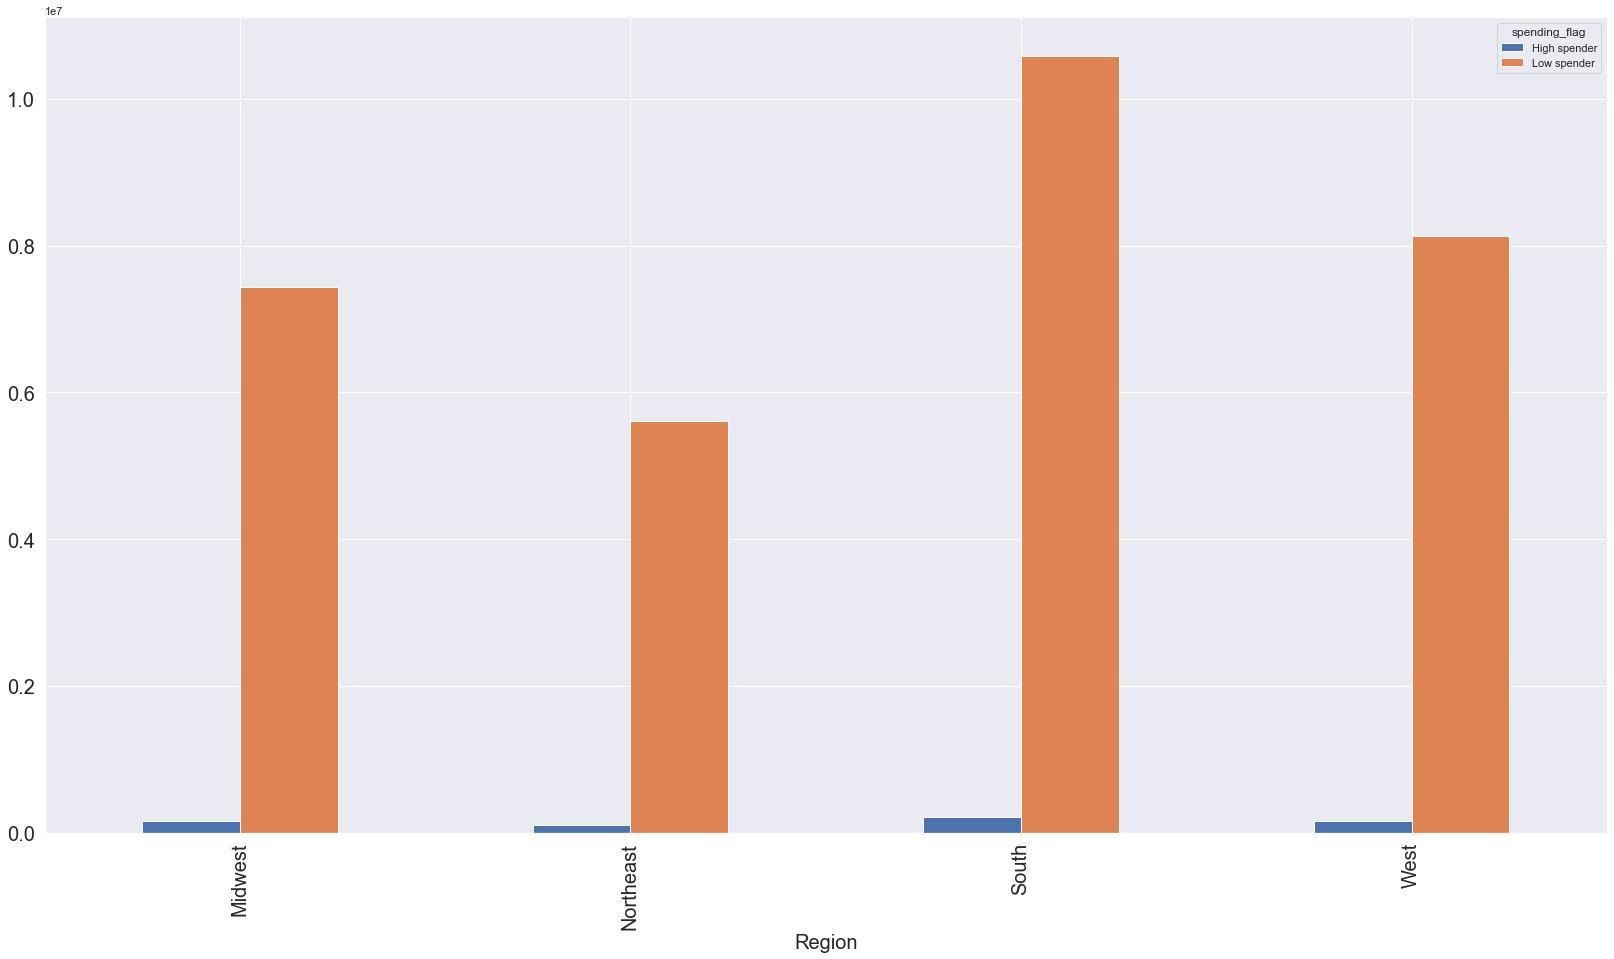

In [18]:
#set script figure size to 28,15
sns.set(rc = {'figure.figsize':(28,15)})
#regional distribution of customers
region_spending_bar = crosstab.plot.bar(fontsize = 20)
plt.xlabel('Region', fontsize = 20)

# 4 Creating exclusion flag for low-activity customers

In [19]:
#Creating exclusion flag for low-activity customers: less than 5 as Low Activity and >=5 as regular activity
df.loc[df['max_order']>=5, 'activity']='regular activity'
df.loc[df['max_order']<5, 'activity']='low activity'

In [20]:
df['activity'].value_counts(dropna = False)

regular activity    30964564
low activity         1440295
Name: activity, dtype: int64

In [21]:
#Creating a dataset of customers with orders lower than 5
inactive_customers=df[df['activity']=='low activity']

In [22]:
inactive_customers.shape

(1440295, 33)

In [23]:
#Exporting the dataset of inactive customers
inactive_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'inactive_customers.pkl'))

In [24]:
#excluding low activity customers from dataset
df.drop(df[df['activity']=='low activity'].index, inplace=True)

In [25]:
df['activity'].value_counts(dropna = False)

regular activity    30964564
Name: activity, dtype: int64

# 5 Creating customer profiles

# A. Age Profile

In [27]:
#creating age group flag; young group <= 24, adult > 24 and < 65 and Senior >=65
df.loc[df['Age']<=24, 'age_group']='Young'
df.loc[(df['Age']>24)&(df['Age']<65), 'age_group']='Adult'
df.loc[df['Age']>=65, 'age_group']='Senior'
df['age_group'].value_counts(dropna=False)

Adult     19353826
Senior     8195544
Young      3415194
Name: age_group, dtype: int64

# B. Income Profile 

In [28]:
# creating income group flag: <55,000- low income, >=55,000 & <200,000- average income, >=200,000- high income
df.loc[df['income'] < 55000, 'income_group'] = 'low income'
df.loc[(df['income'] >= 55000) & (df['income'] < 200000), 'income_group'] = 'average income'
df.loc[df['income'] >= 200000, 'income_group'] = 'high income'

In [29]:
df['income_group'].value_counts(dropna = False)

average income    26258034
low income         4452388
high income         254142
Name: income_group, dtype: int64

# C. Number of Dependants Profile

In [30]:
#customers with 0 dependents are no dependents customers and customers with more than 0 dependents are has dependents
df.loc[df['no_of_dependants']== 0, 'dependent_flag'] = 'No dependents'
df.loc[df['no_of_dependants'] > 0, 'dependent_flag'] = 'has dependents'

In [31]:
df['dependent_flag'].value_counts(dropna = False)

has dependents    23224883
No dependents      7739681
Name: dependent_flag, dtype: int64

# D. Department Flags

In [32]:
df_departments.columns

Index(['Unnamed: 0', 'department'], dtype='object')

In [33]:
#Renaming the column
df_departments.rename(columns={'Unnamed: 0':'department_id'}, inplace=True)

In [34]:
# merging the dataframes df and df_departments
df_merged=df.merge(df_departments, on='department_id')

In [35]:
df_merged.shape

(30964564, 37)

In [36]:
df_merged['department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

# Pet profile

In [37]:
# Creating flag for customers who has purchsed pet products: has a pet - 'has pets'/doesn't have pets - 'no pets'.
df_merged.loc[df_merged['department'] == 'pets', 'pet_flag'] = 'has pets'
df_merged.loc[df_merged['department'] != 'pets', 'pet_flag'] = 'no pets'

In [38]:
df_merged['pet_flag'].value_counts(dropna = False)

no pets     30871504
has pets       93060
Name: pet_flag, dtype: int64

# Babies profile

In [39]:
# Creating flag for customers who purchased babies products: has a  - 'has babies'/doesn't have pets - 'no babies'.
df_merged.loc[df_merged['department'] == 'babies', 'babies_flag'] = 'has babies'
df_merged.loc[df_merged['department'] != 'babies', 'babies_flag'] = 'no babies'

In [40]:
df_merged['babies_flag'].value_counts(dropna = False)

no babies     30554172
has babies      410392
Name: babies_flag, dtype: int64

# 6 Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

 # a. Age profile aggregation

In [41]:
#Aggregating the max, mean, and min variables on a age-profile level for usage frequency and expenditure.
df_merged.groupby('age_group').agg({'median_order': ['mean', 'min', 'max'], 'prices':['mean','min','max']})

median_order               prices           
                  mean  min   max      mean  min   max
age_group                                             
Adult         9.975364  0.0  30.0  7.787981  1.0  25.0
Senior        9.933025  0.0  30.0  7.796715  1.0  25.0
Young         9.911733  0.0  30.0  7.790680  1.0  25.0

# b. Income profile aggregation

In [42]:
df_merged.groupby('income_group').agg({'median_order': ['mean', 'min', 'max'], 'prices':['mean','min','max']})

median_order               prices           
                       mean  min   max      mean  min   max
income_group                                               
average income     9.885678  0.0  30.0  7.939081  1.0  25.0
high income        9.030562  1.0  30.0  7.777393  1.0  25.0
low income        10.431478  0.0  30.0  6.915685  1.0  25.0

# c. Number of dependants profile aggregation

In [43]:
df_merged.groupby('dependent_flag').agg({'median_order': ['mean', 'min', 'max'], 'prices':['mean','min','max']})

median_order               prices           
                       mean  min   max      mean  min   max
dependent_flag                                             
No dependents      9.936569  0.0  30.0  7.789550  1.0  25.0
has dependents     9.963995  0.0  30.0  7.790937  1.0  25.0

# d. Pet Profile aggregation

In [44]:
df_merged.groupby('pet_flag').agg({'median_order': ['mean', 'min', 'max'], 'prices':['mean','min','max']})

median_order               prices           
                 mean  min   max      mean  min   max
pet_flag                                             
has pets    10.697905  0.0  30.0  7.887489  1.0  15.0
no pets      9.954907  0.0  30.0  7.790298  1.0  25.0

# e. Babies Profile aggregation

In [45]:
df_merged.groupby('babies_flag').agg({'median_order': ['mean', 'min', 'max'], 'prices':['mean','min','max']})

median_order               prices           
                    mean  min   max      mean  min   max
babies_flag                                             
has babies      8.758564  0.0  30.0  7.634399  1.0  15.0
no babies       9.973239  0.0  30.0  7.792688  1.0  25.0

# 7. Creating visualizations to show the distribution of profiles

# a. Age Profile distribution

In [46]:
#Creatig a subset with unique customers
df_unique = df_merged.drop_duplicates(subset='user_id')

In [47]:
df_unique.shape

(162631, 39)

Text(0, 0.5, 'Total number of customers')

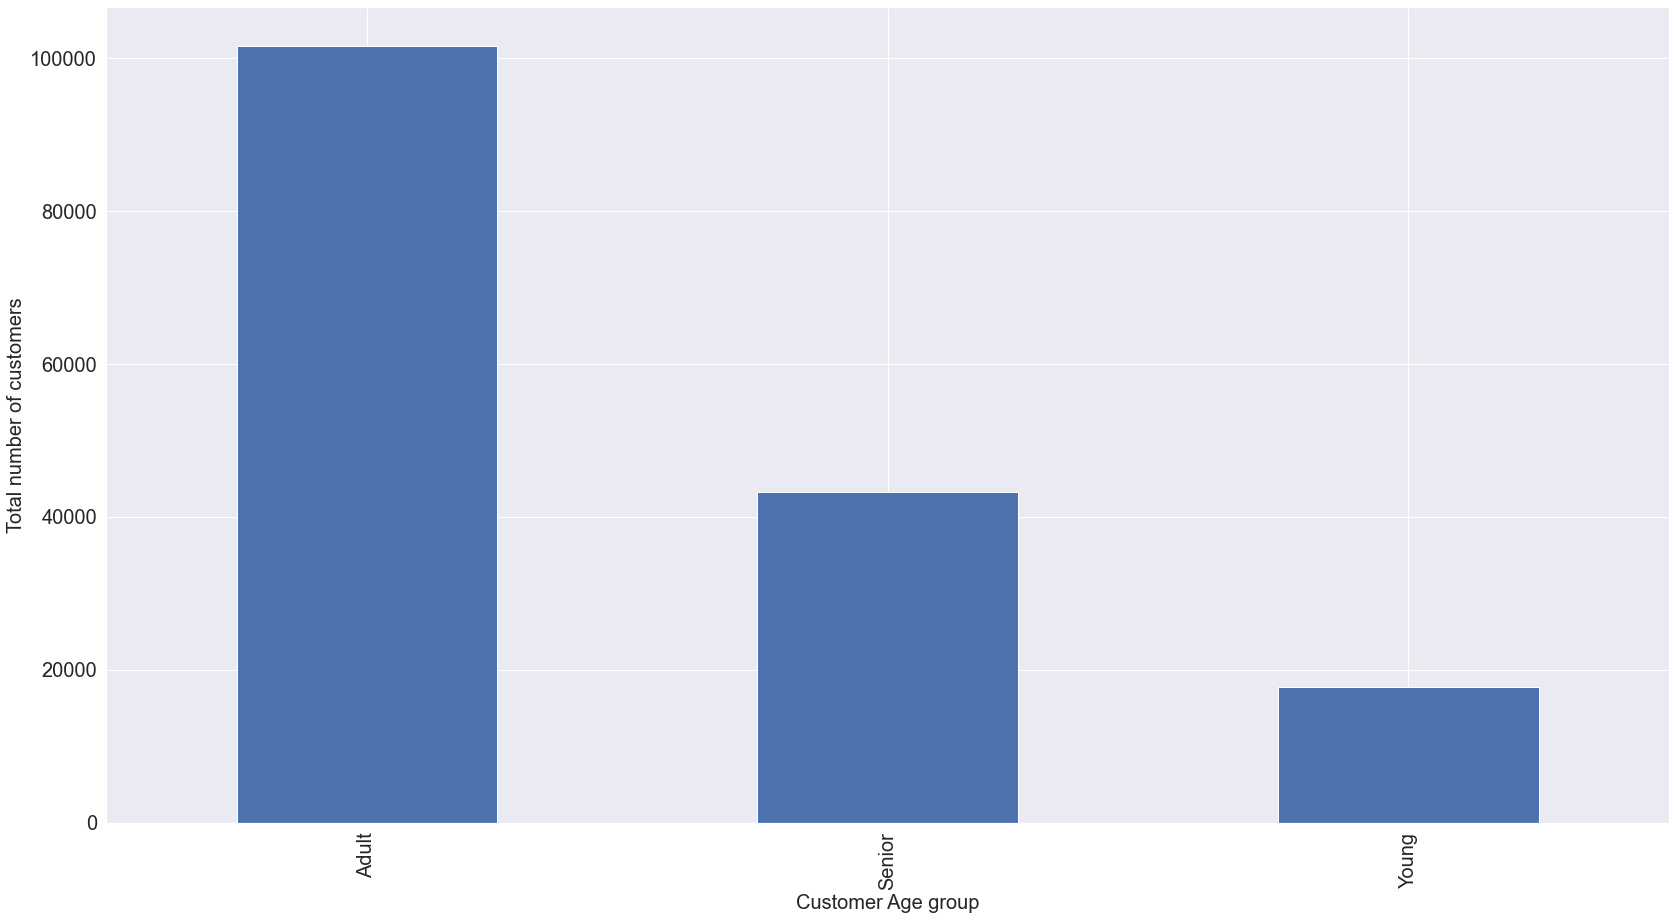

In [48]:
#Creating a bar chart for age distribution of customers
bar_age = df_unique['age_group'].value_counts().plot.bar(fontsize=20)
plt.xlabel('Customer Age group', fontsize=20)
plt.ylabel('Total number of customers', fontsize=20)

In [49]:
#Number of customer groups in each region
age_region=pd.crosstab(df_unique['region'], df_unique['age_group'].sort_values(ascending=False))
age_region

age_group,Adult,Senior,Young
region,,,
Midwest,24053,10169,4154
Northeast,17955,7580,3046
South,33716,14433,6044
West,25891,11068,4522


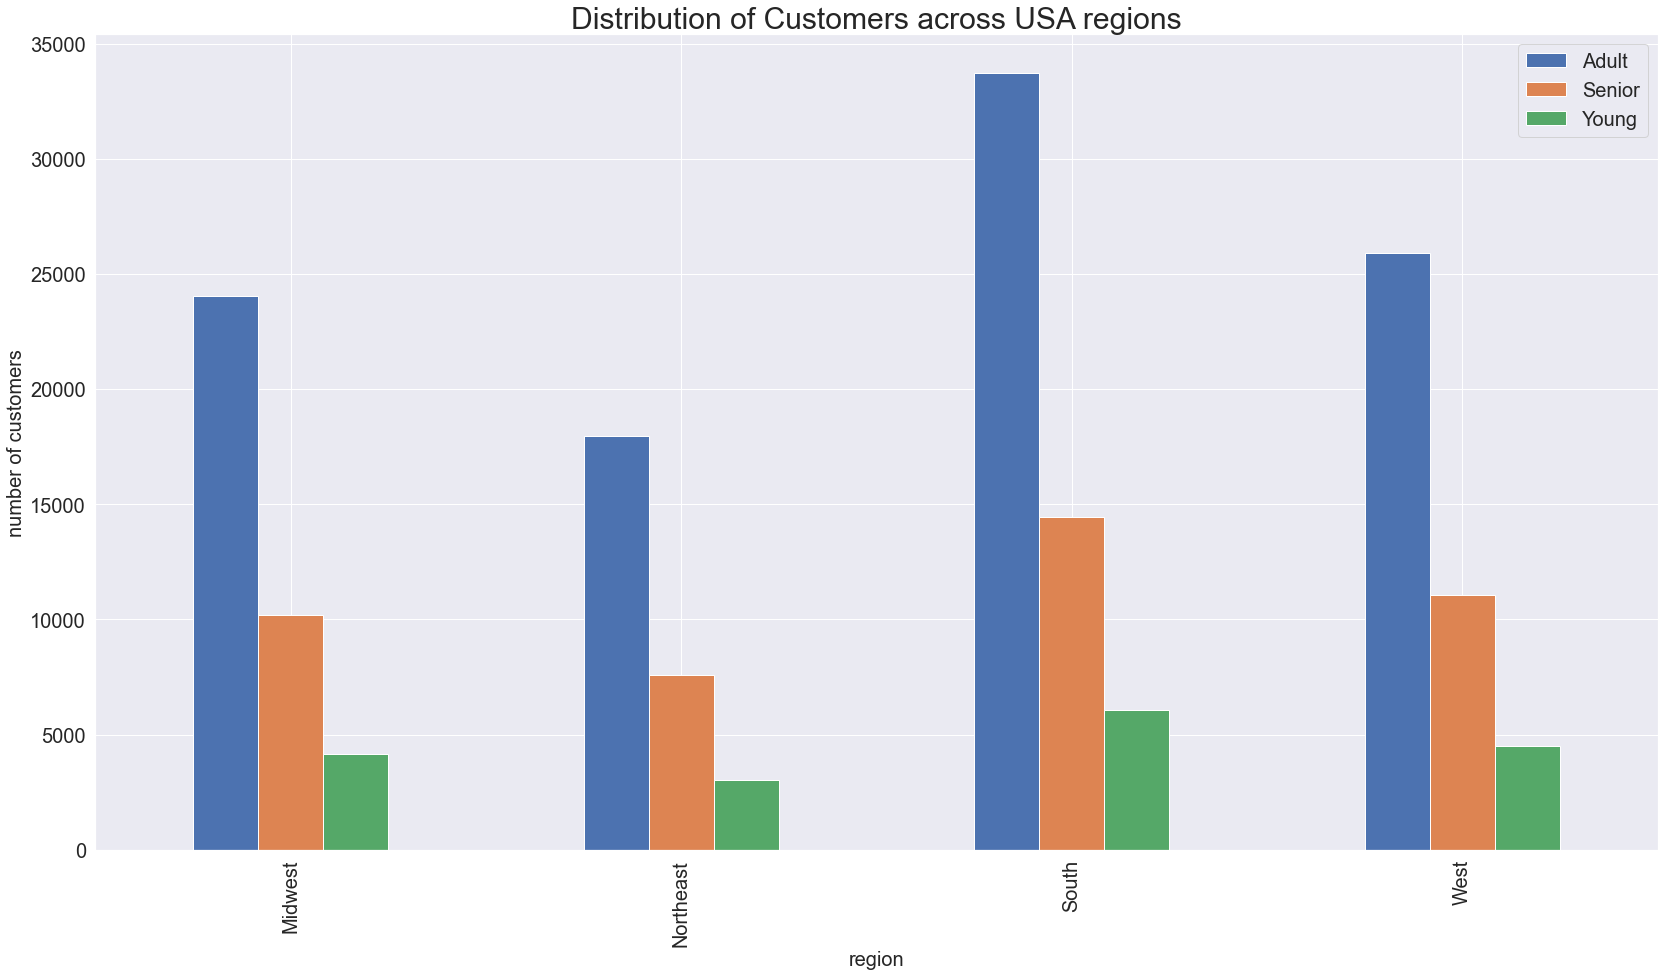

In [50]:
#Creating grouped bar chart of customer groups and regions
bar_age_region=age_region.plot.bar(fontsize=20)
plt.title('Distribution of Customers across USA regions', fontsize=30)
plt.xlabel('region', fontsize=20)
plt.ylabel('number of customers', fontsize=20)
plt.legend(fontsize=20)

In [51]:
#Relationship between loyalty flag and age group
age_loyalty = pd.crosstab(df_unique['age_group'], df_unique['loyalty_flag'].sort_values(ascending=False))
age_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
age_group,,,
Adult,10595,43042,47978
Senior,4551,18192,20507
Young,1871,7516,8379


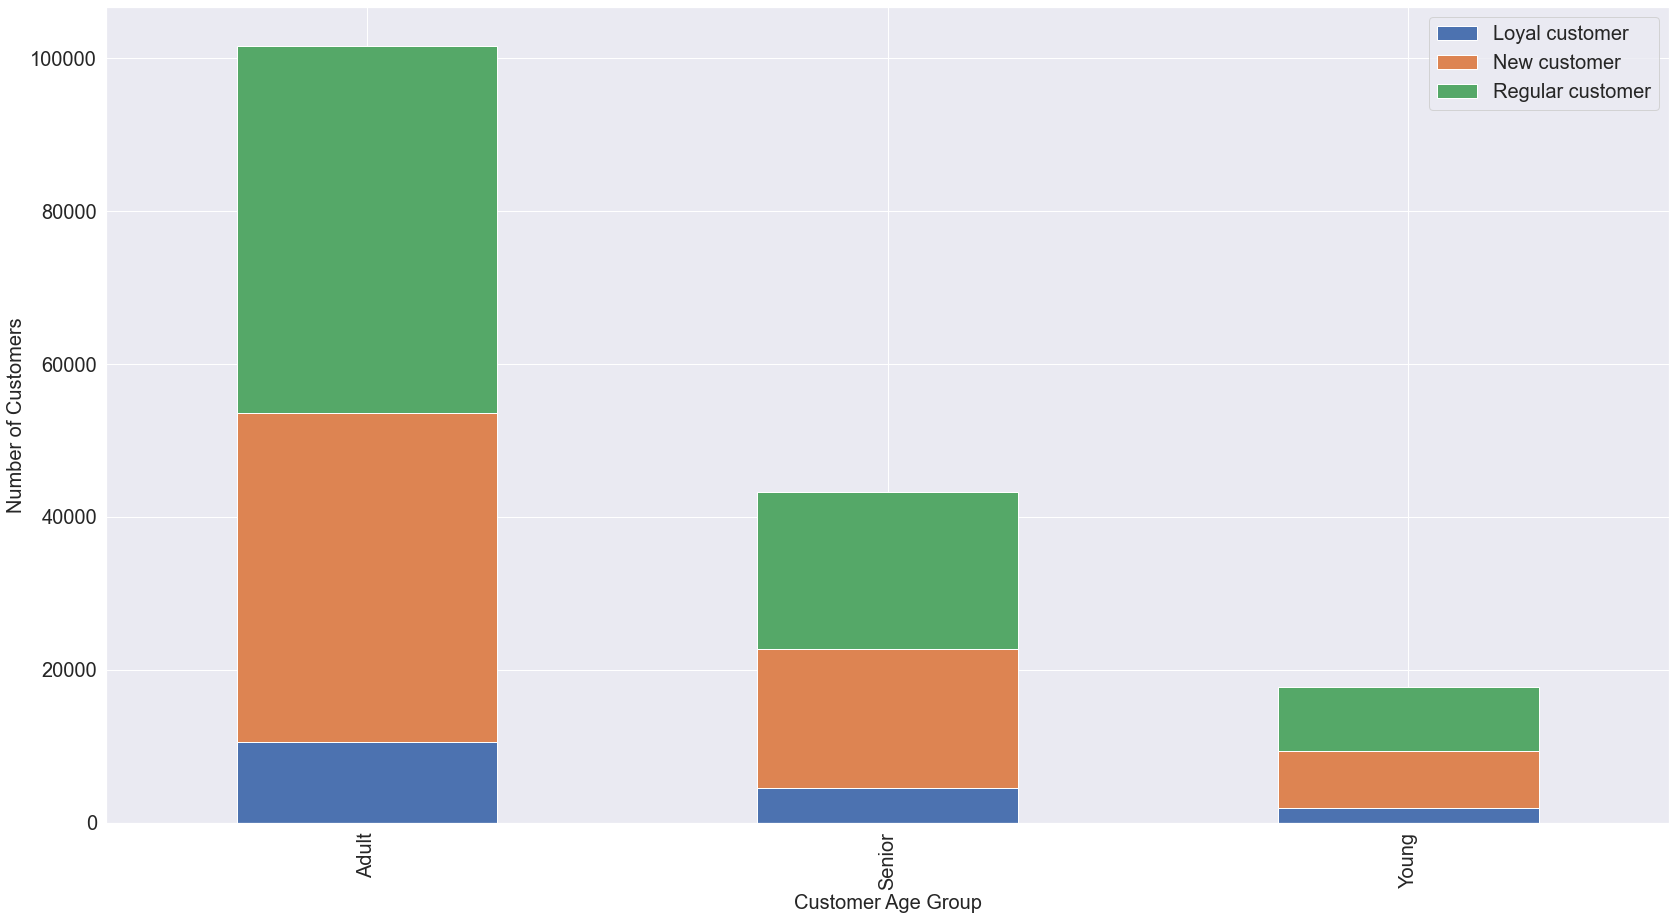

In [52]:
# creating stacked bar chart to show relationship betn loyalty flag and age group
loyalty_age = age_loyalty.plot.bar(stacked=True, fontsize = 20)
plt.xlabel('Customer Age Group', fontsize=20)
plt.ylabel('Number of Customers', fontsize=20)
plt.legend(fontsize=20)

In [53]:
# finding order time of different customer age groups
age_ordertime=pd.crosstab(df_merged['order_hour_of_day'], df_merged['age_group'], dropna= False)
age_ordertime

age_group,Adult,Senior,Young
order_hour_of_day,,,
0,130696,53395,23951
1,68097,28688,12836
2,40073,17458,8160
3,29982,13395,5419
4,30834,13680,6249
5,51224,23286,9908
6,171940,75229,33844
7,534694,233067,95452
8,1037608,441458,180044


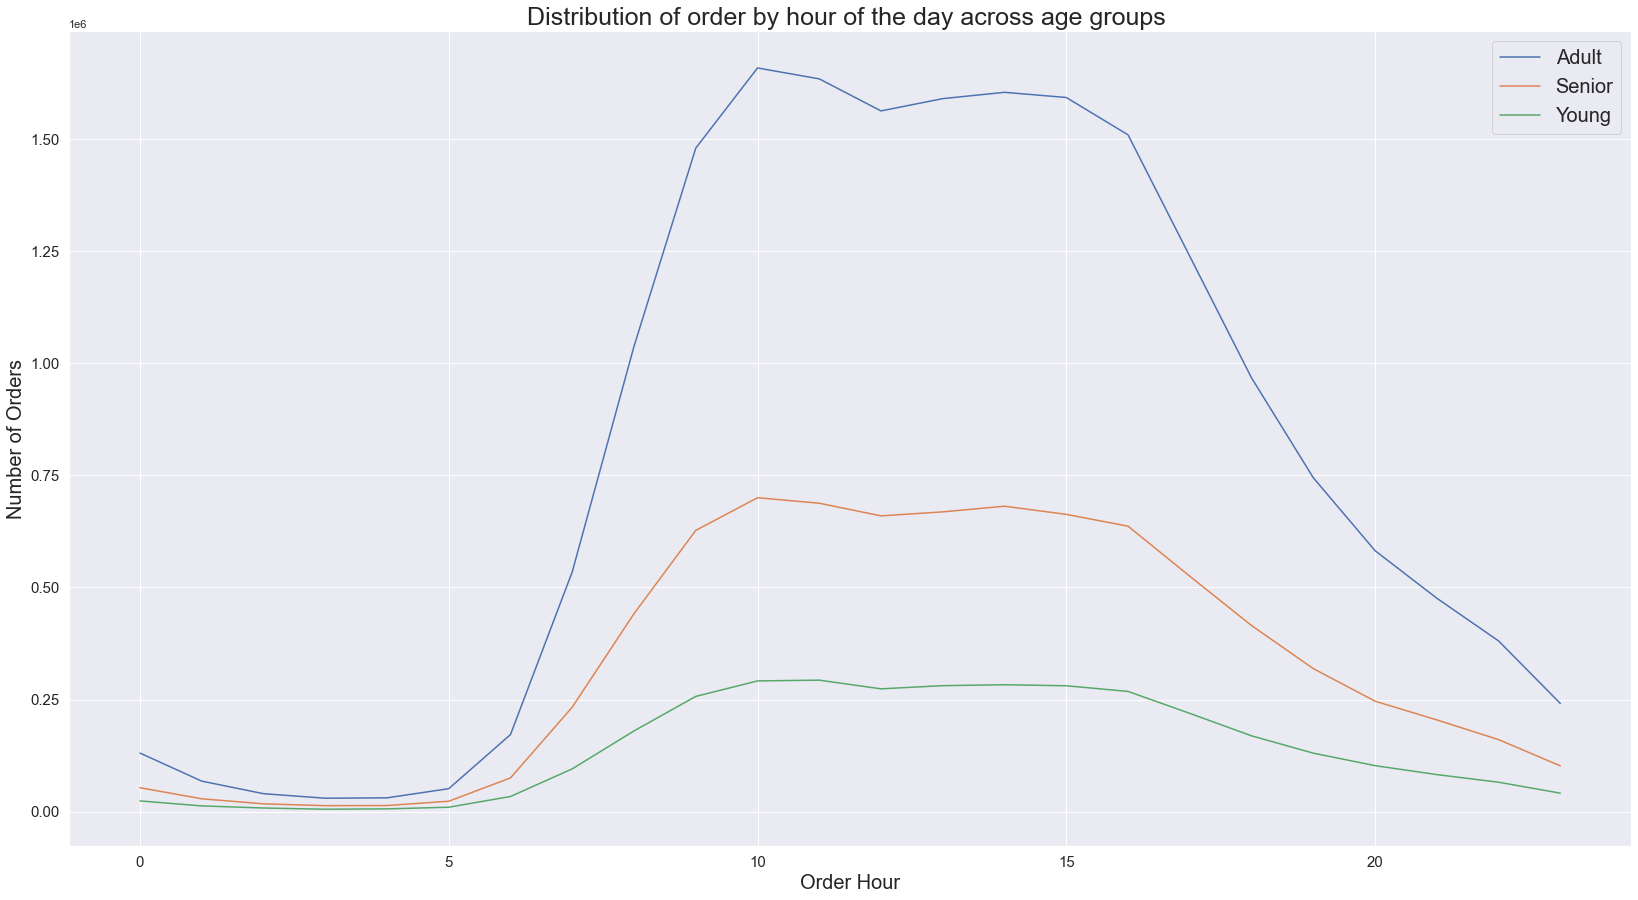

In [54]:
#Plotting linechart of orders per hour by age groups
line_age_ordertime = age_ordertime.plot.line(fontsize = 15)
plt.title('Distribution of order by hour of the day across age groups ', fontsize=25)
plt.xlabel('Order Hour', fontsize=20)
plt.ylabel('Number of Orders', fontsize=20)
plt.legend(fontsize=20)

In [55]:
# finding Orders by day of week
age_orderday = pd.crosstab(df_merged['orders_day_of_the_week'],df_merged['age_group'], dropna = False)
age_orderday

age_group,Adult,Senior,Young
orders_day_of_the_week,,,
0,3691847,1566244,650519
1,3393908,1417495,600283
2,2517581,1065170,441955
3,2287973,978350,403212
4,2270814,956161,398019
5,2518439,1066115,449175
6,2673264,1146009,472031


Text(0, 0.5, 'Number of Orders')

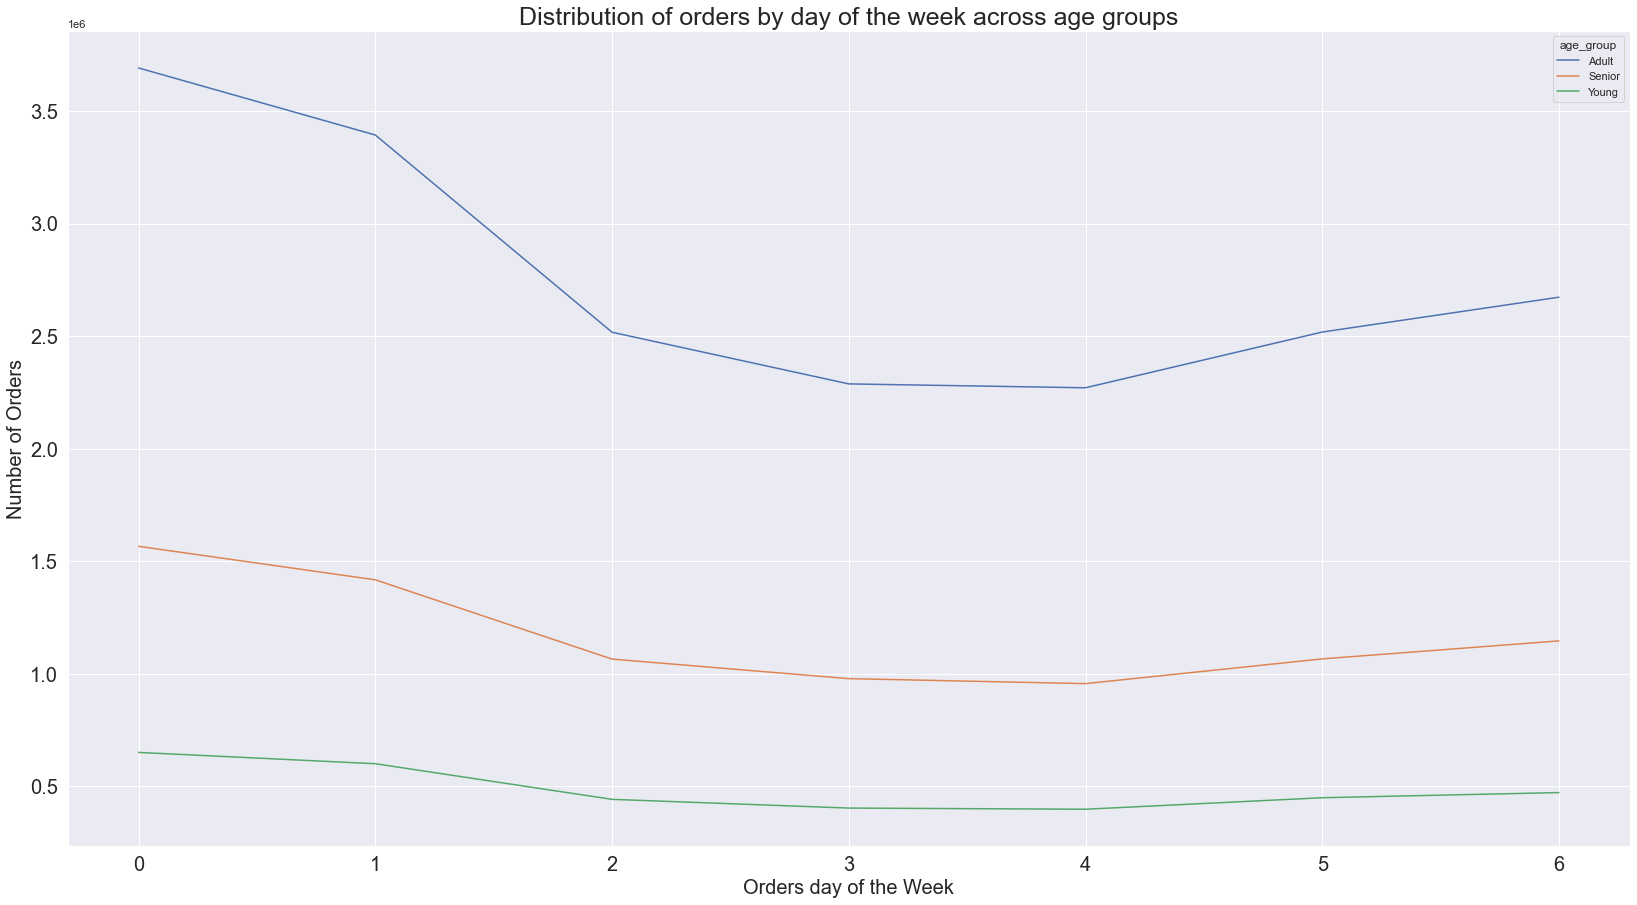

In [56]:
#Plotting linechart of orders by day of the week by age groups
line_age_orderday = age_orderday.plot.line(fontsize = 20)
plt.title('Distribution of orders by day of the week across age groups', fontsize = 25)
plt.xlabel('Orders day of the Week', fontsize = 20)
plt.ylabel('Number of Orders', fontsize = 20)

# b. Income Profile distribution

Text(0, 0.5, 'Number of Customers')

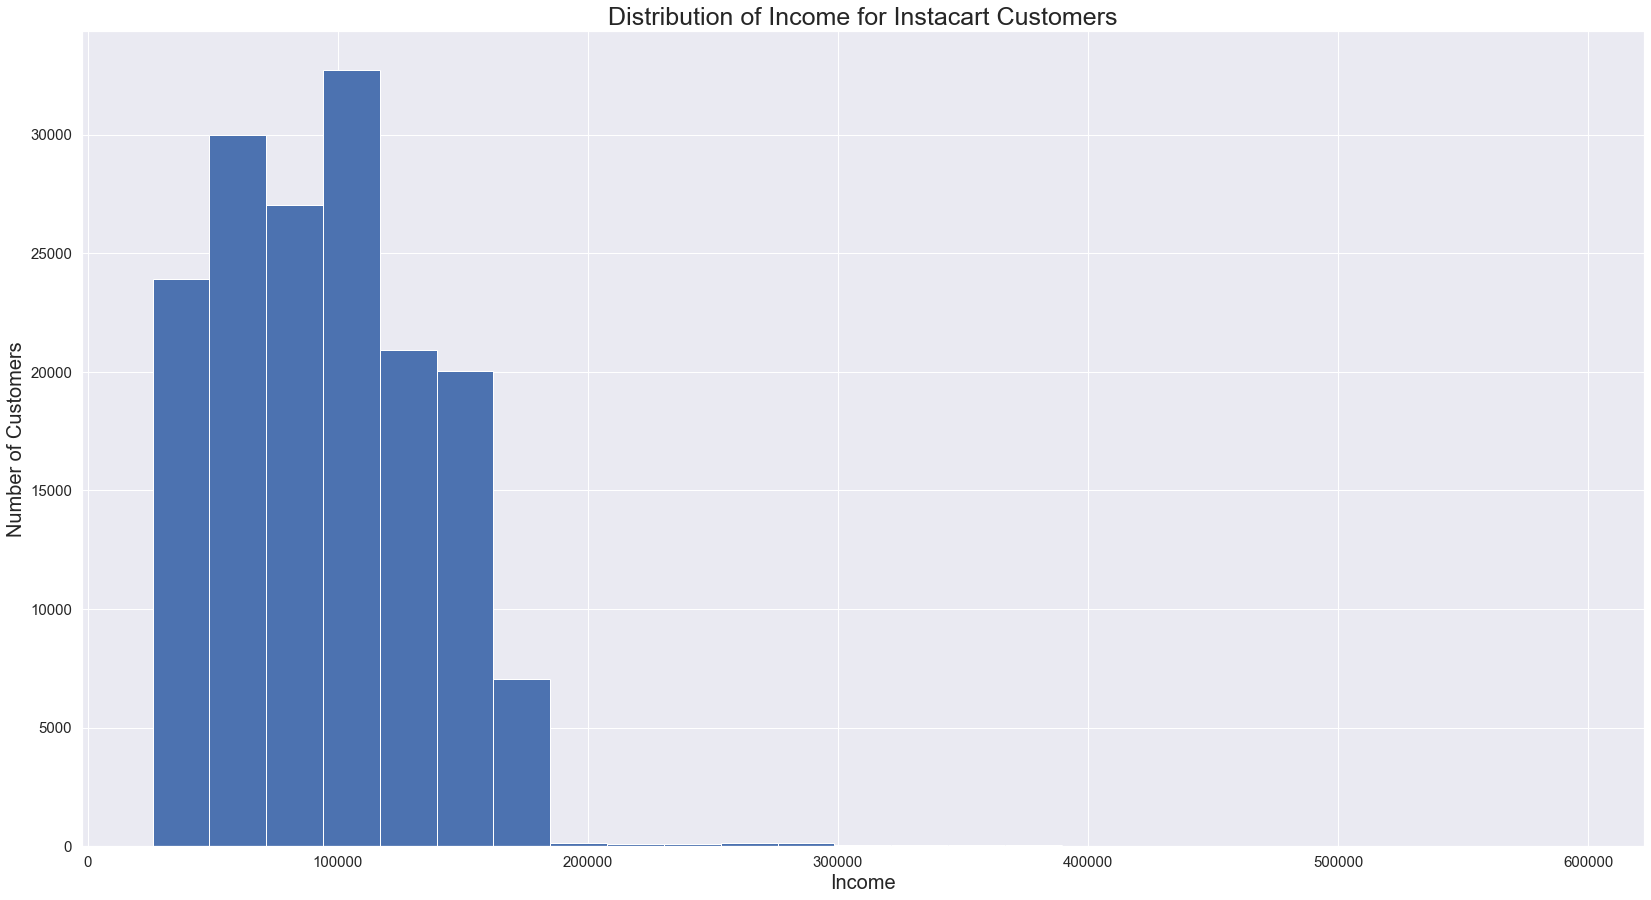

In [57]:
#Creating a histogram of customers' income
Hist_income = df_unique['income'].plot.hist(bins=25, fontsize = 15)
plt.title('Distribution of Income for Instacart Customers', fontsize = 25)
plt.xlabel('Income', fontsize = 20)
plt.ylabel('Number of Customers', fontsize = 20)

In [58]:
# Distribution of income groups across regions
income_region =pd.crosstab(df_unique['region'], df_unique['income_group'], dropna=False)
income_region

income_group,average income,high income,low income
region,,,
Midwest,30870,211,7295
Northeast,22884,145,5552
South,43400,307,10486
West,33208,239,8034


Text(0, 0.5, 'Number of Customers')

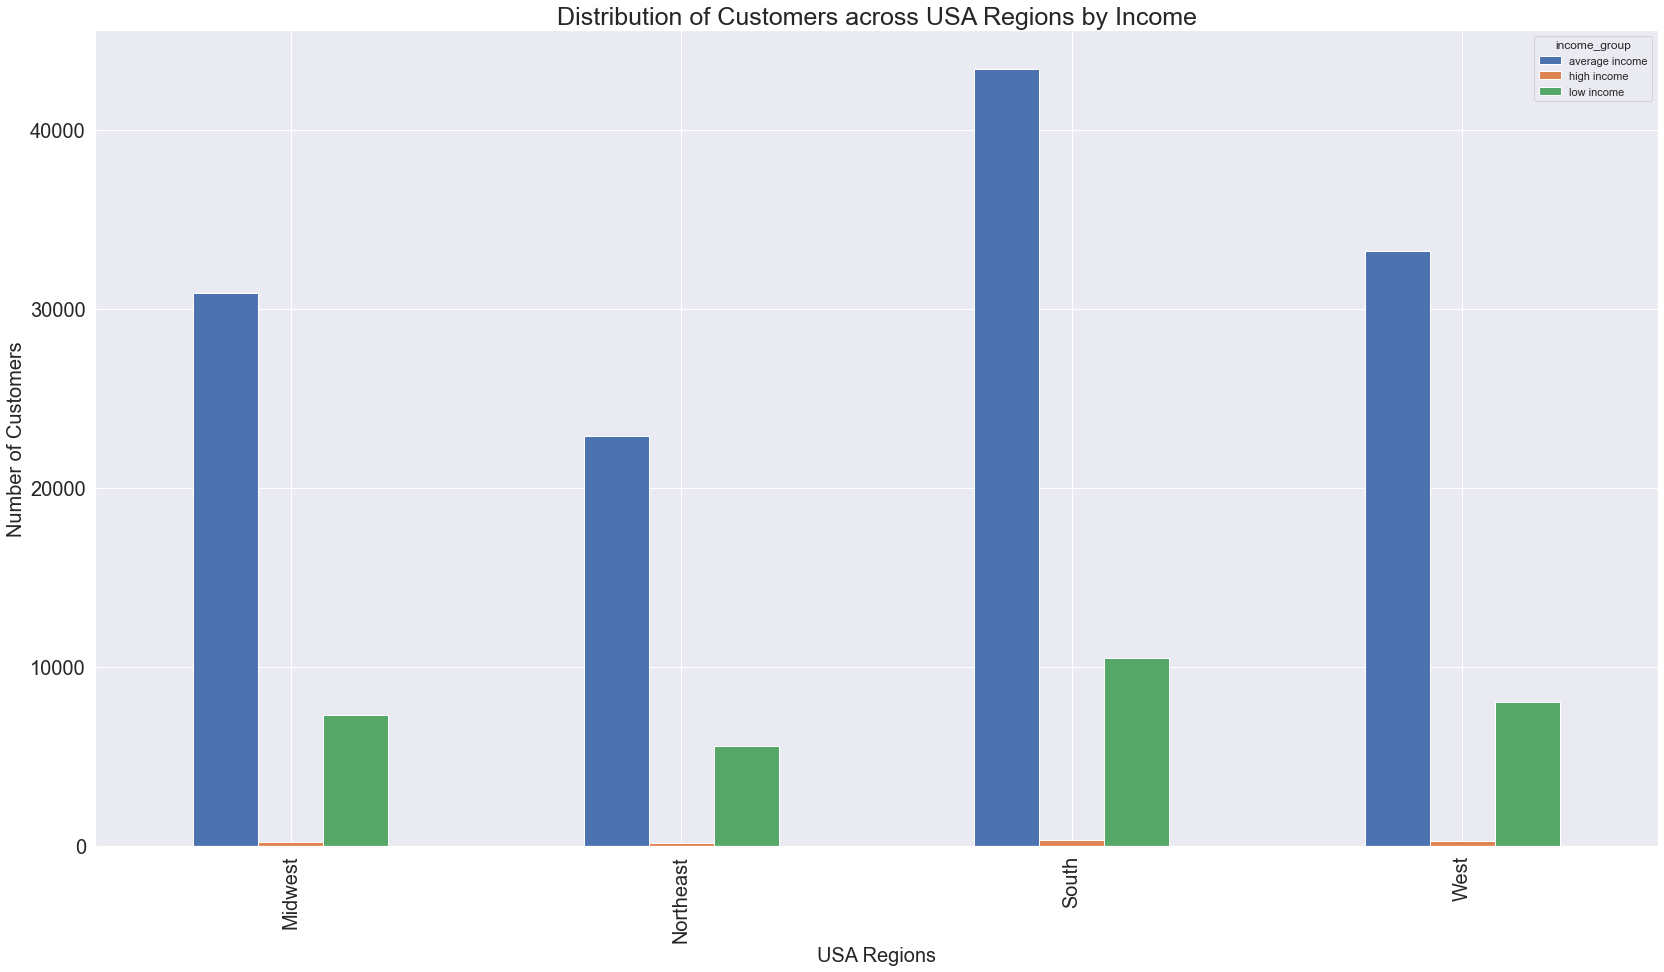

In [59]:
#Grouped bar chart of income groups and regions
bar_income_region = income_region.plot.bar(fontsize = 20)
plt.title('Distribution of Customers across USA Regions by Income', fontsize = 25)
plt.xlabel('USA Regions', fontsize = 20)
plt.ylabel('Number of Customers', fontsize = 20)

In [60]:
#Loyalty flags by income groups
income_loyalty=pd.crosstab(df_unique['loyalty_flag'], df_unique['income_group'])
income_loyalty

income_group,average income,high income,low income
loyalty_flag,,,
Loyal customer,14122,152,2743
New customer,53900,235,14615
Regular customer,62340,515,14009


In [61]:
#Relationship between customer age group with income
age_income = pd.crosstab(df_unique['age_group'], df_unique['income_group'], dropna = False)
age_income

income_group,average income,high income,low income
age_group,,,
Adult,80798,563,20254
Senior,36723,296,6231
Young,12841,43,4882


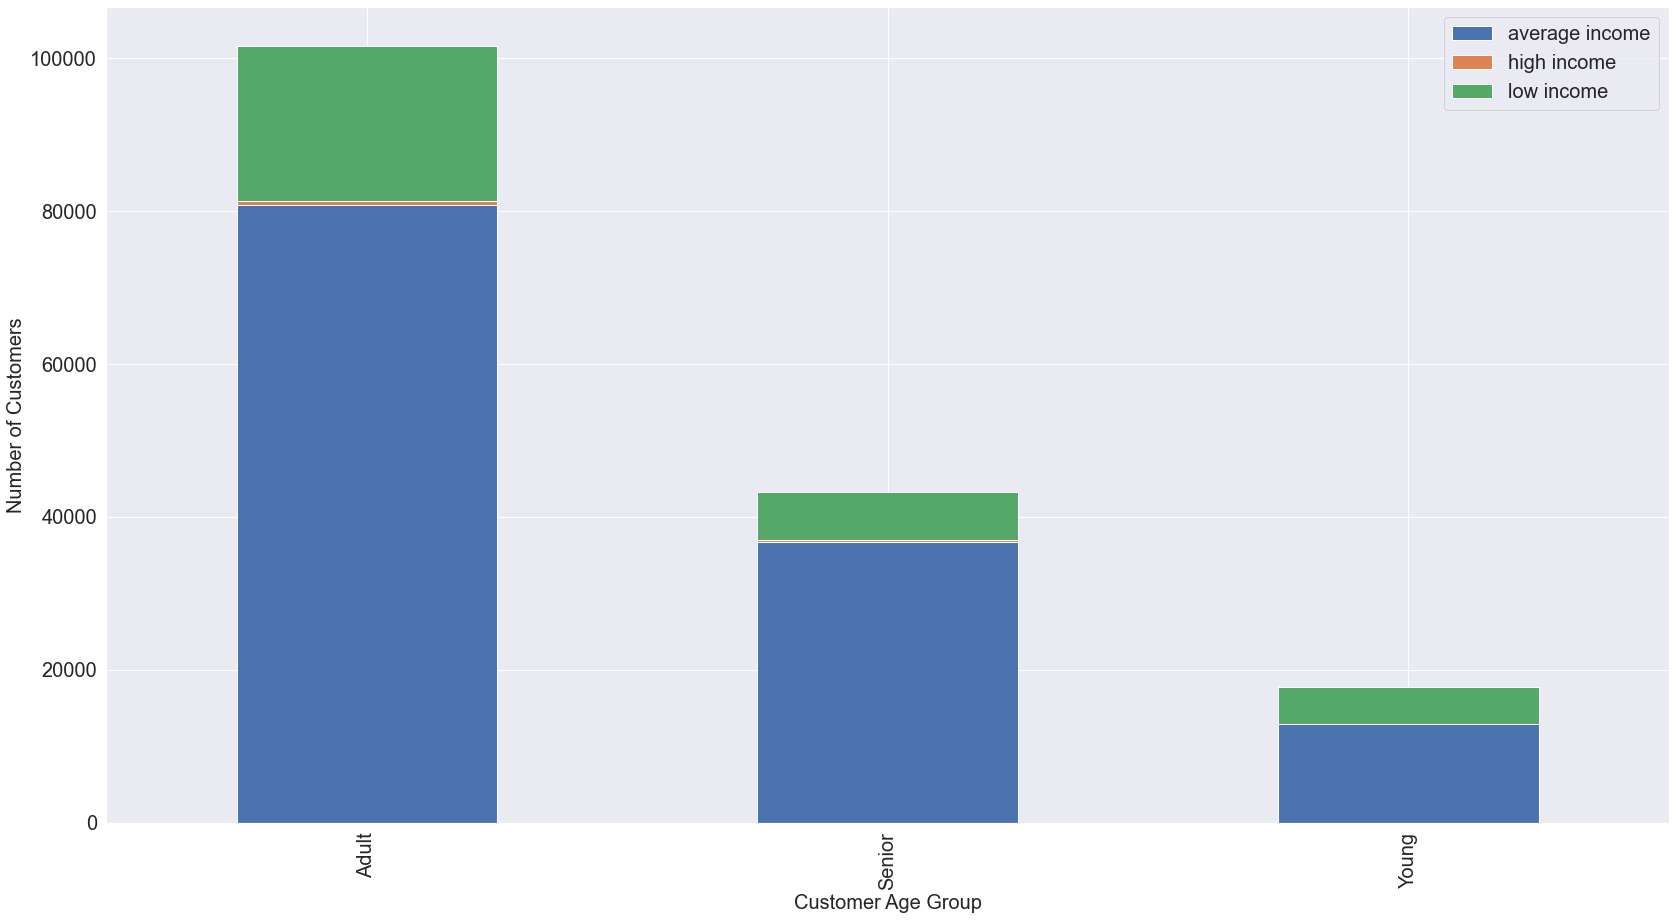

In [62]:
# creating stacked bar chart to show relationship betn income group and age group
bar_age_income = age_income.plot.bar(stacked=True, fontsize = 20)
plt.xlabel('Customer Age Group', fontsize=20)
plt.ylabel('Number of Customers', fontsize=20)
plt.legend(fontsize=20)

In [63]:
# Relationship between income group and order frequency
income_frequency = pd.crosstab( df_unique['income_group'],df_unique['order_frequency_flag'], dropna = False)
income_frequency

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
income_group,,,
average income,62026,28340,39996
high income,499,129,274
low income,13402,8196,9769


In [64]:
# Comparing level of income and price range of ordered products 
income_pricerange = pd.crosstab(df['income_group'],df['price_range_loc'], dropna = False)
income_pricerange

price_range_loc,High_range product,Low_range product,Mid_range product
income_group,,,
average income,362542,7840524,18054968
high income,5992,78883,169267
low income,29419,1755433,2667536


Text(0.5, 0, 'Price range of product')

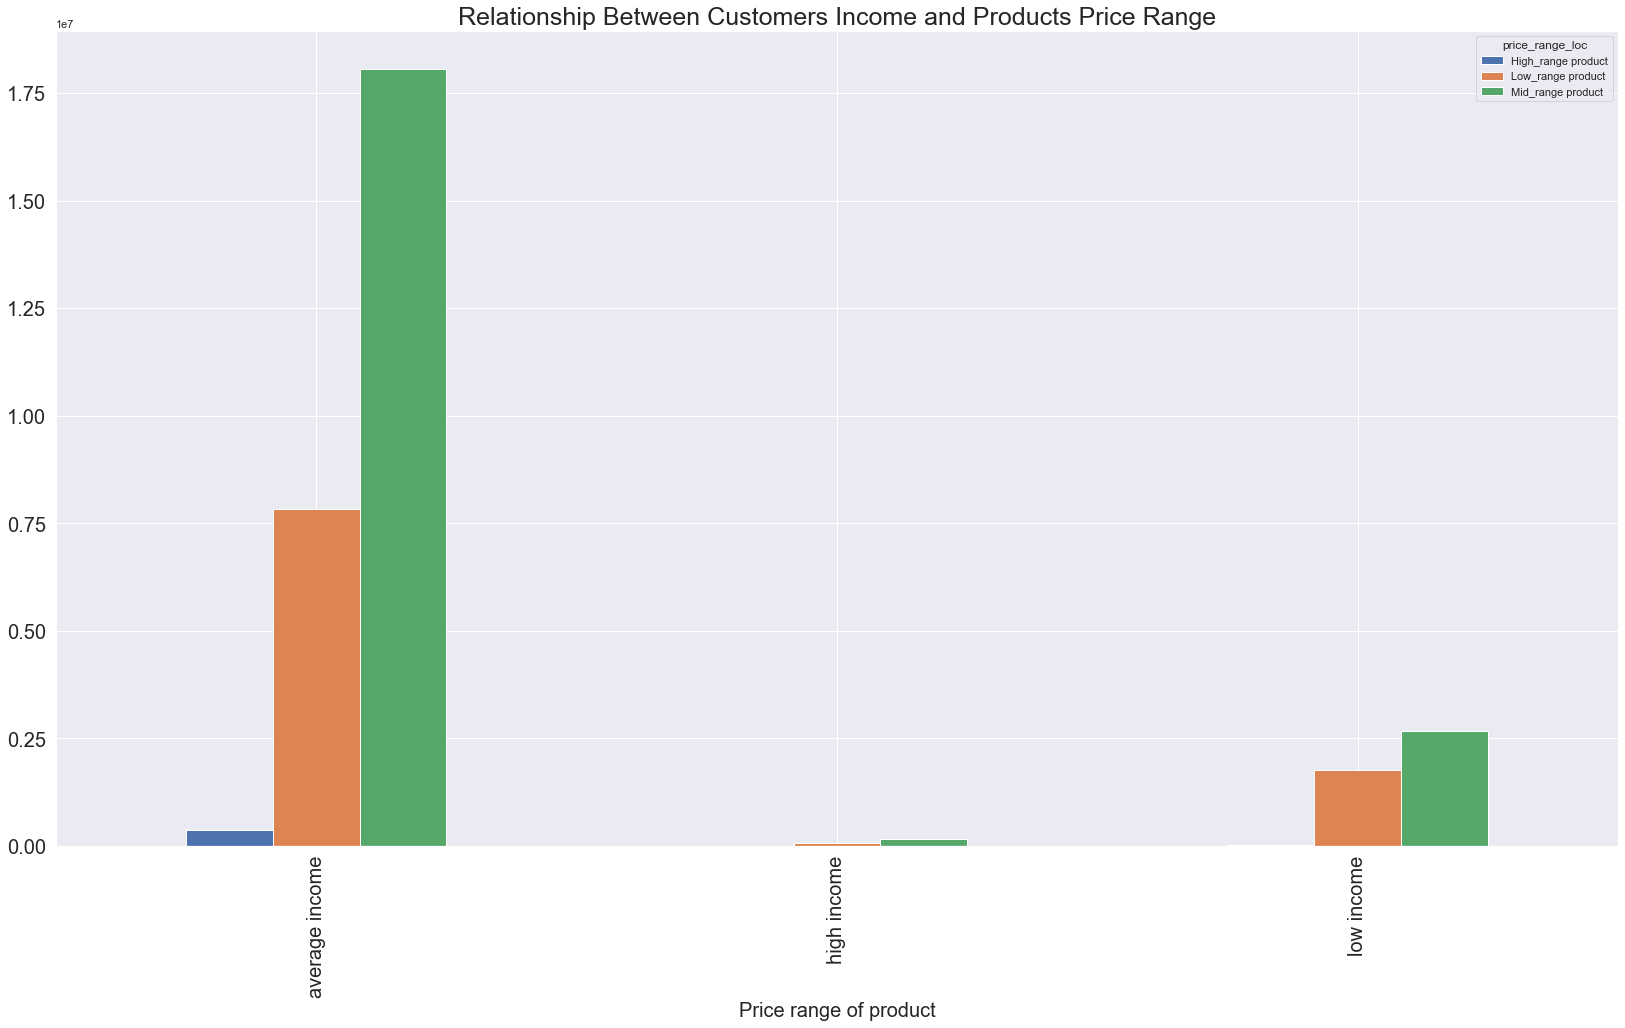

In [65]:
# creating stacked bar chart to compare level of income and price range of ordered products 
bar_income_price=income_pricerange.plot.bar(fontsize=20)
plt.title('Relationship Between Customers Income and Products Price Range', fontsize=25)
plt.xlabel('Price range of product', fontsize=20)

# c. Number of dependents Profile

In [66]:
#Creating a crosstab for dependants and family status
dependents = pd.crosstab(df_unique['marital_status'], df_unique['dependent_flag'], dropna = False)
dependents

dependent_flag,No dependents,has dependents
marital_status,,
divorced/widowed,13831,0
living with parents and siblings,0,7608
married,0,114296
single,26896,0


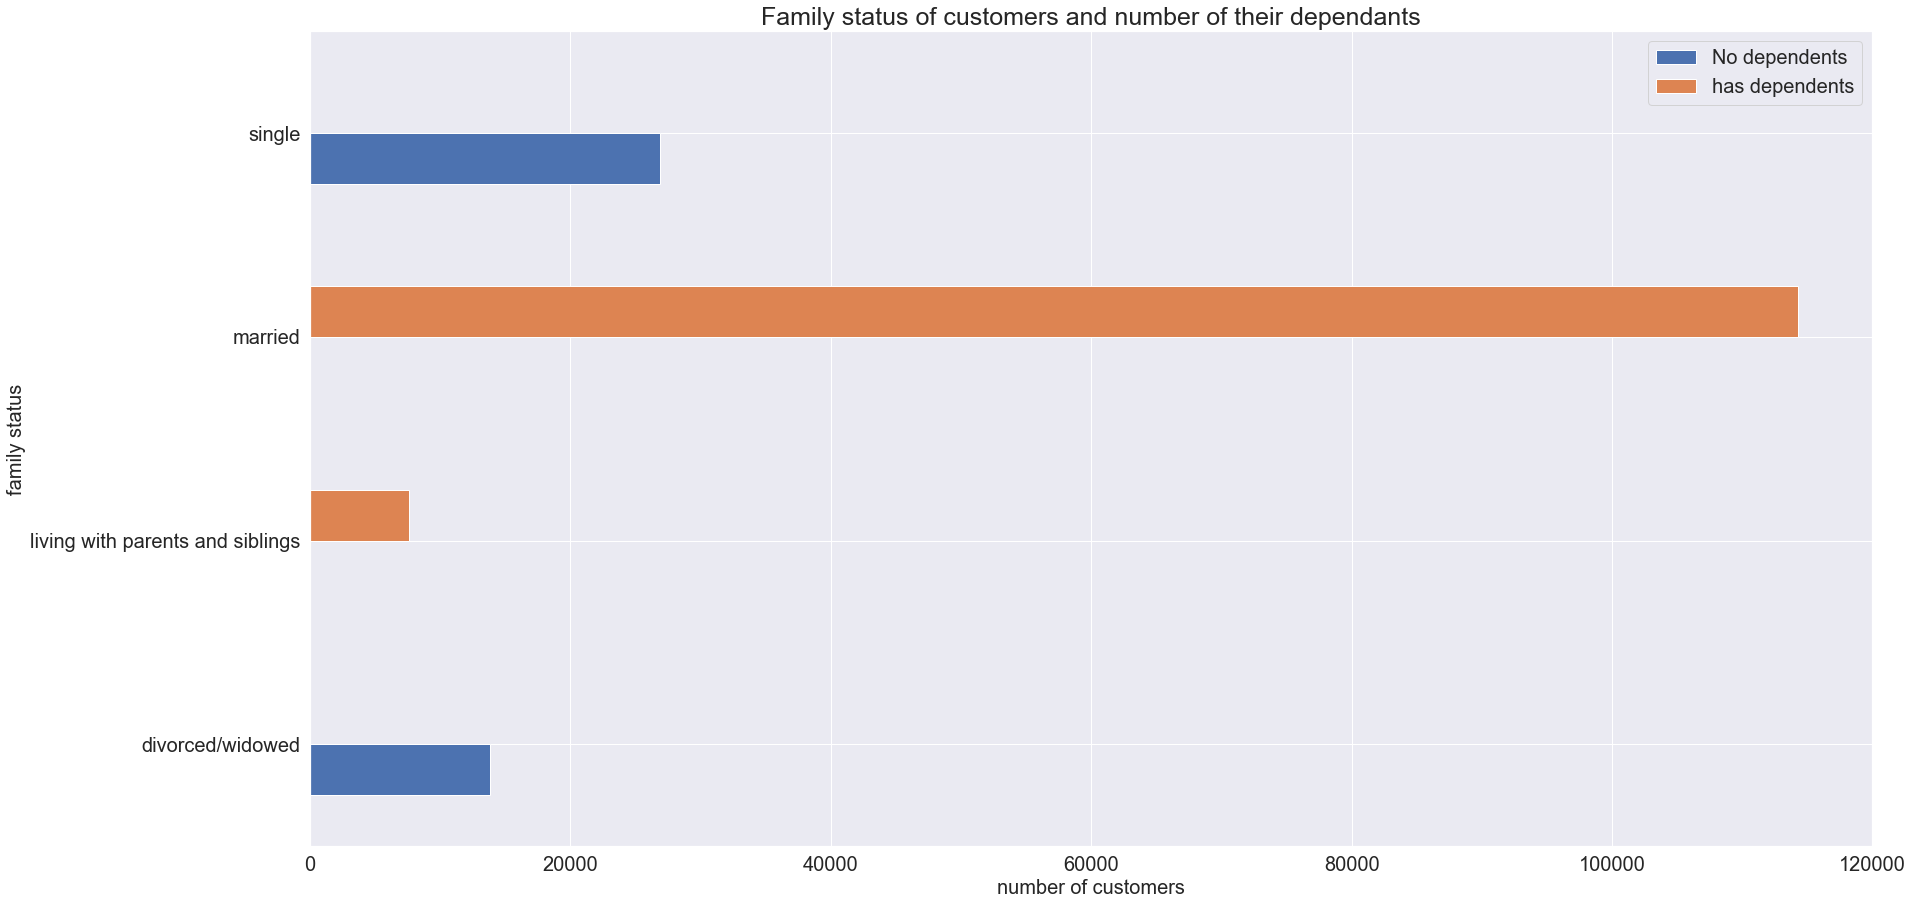

In [67]:
#Creating a bar chart for number of dependants
bar_dependents=dependents.plot.barh(fontsize=20)
plt.title('Family status of customers and number of their dependants', fontsize=25)
plt.xlabel('number of customers', fontsize=20)
plt.ylabel('family status', fontsize=20)
plt.legend(fontsize=20)

In [68]:
#creating cross tabs to display frequency of orders based on number of dependents
dependents_frequency = pd.crosstab(df_unique['order_frequency_flag'], df_unique['dependent_flag'])
dependents_frequency

dependent_flag,No dependents,has dependents
order_frequency_flag,,
Frequent customer,18906,57021
Non-frequent customer,9146,27519
Regular customer,12675,37364


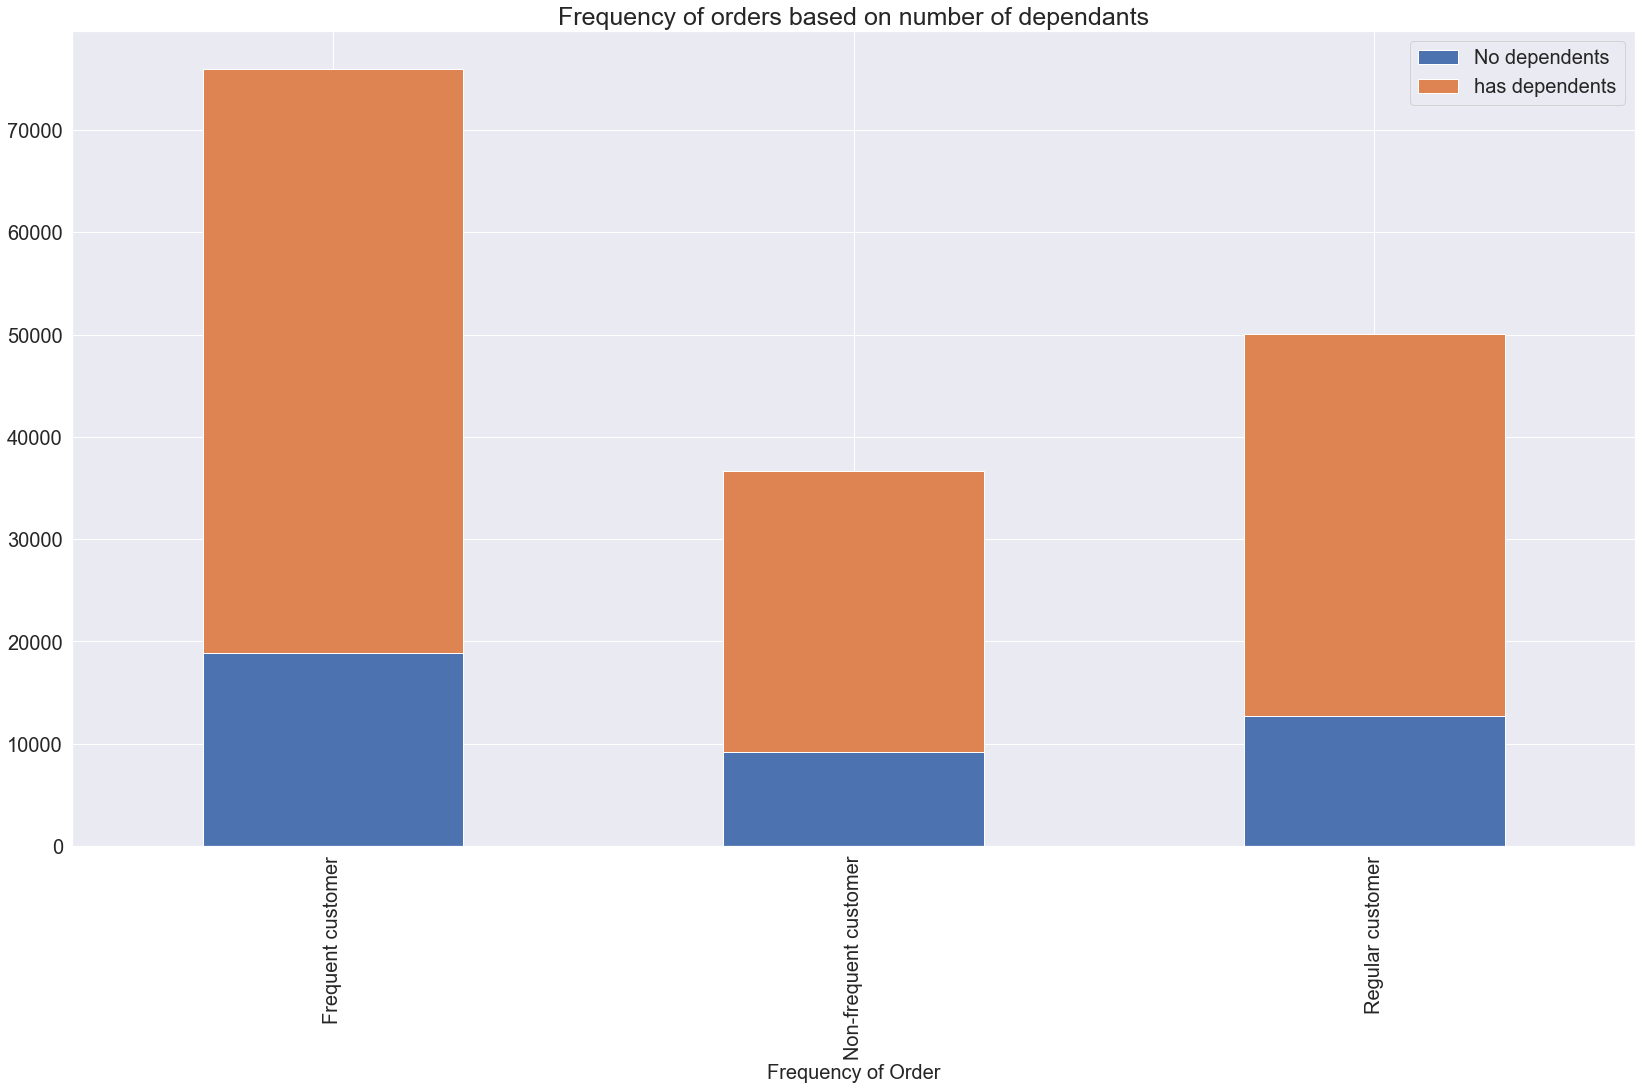

In [69]:
#creating stacked bar chart to shwo Frequency of orders based on dependants
bar_dependant_frequency=dependents_frequency.plot.bar(stacked=True, fontsize=20)
plt.title('Frequency of orders based on number of dependants', fontsize=25)
plt.xlabel('Frequency of Order', fontsize=20)
plt.legend(fontsize=20, loc='upper right')

# d. Department Profile

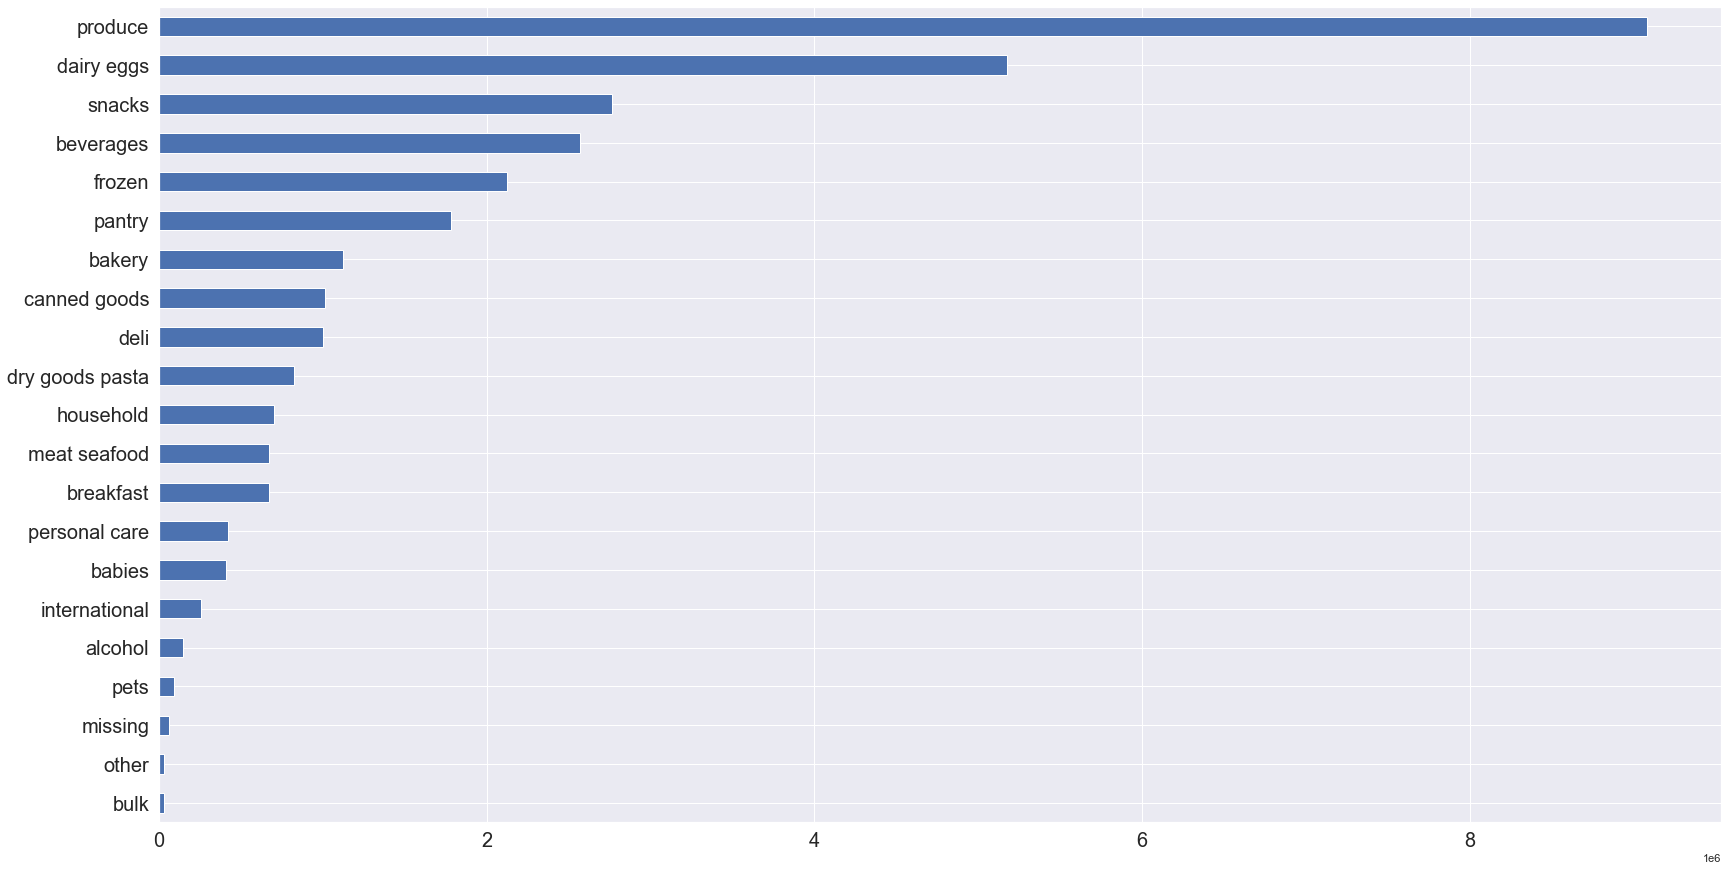

In [70]:
# bar chart showing the total number of orders made for each department
department_bar = df_merged['department'].value_counts().sort_values().plot.barh(fontsize = 20)

In [72]:
#cross tabs for products purchased in each department for region
department_region=pd.crosstab(df_merged['department'],df_merged['region'], dropna=False)
department_region

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


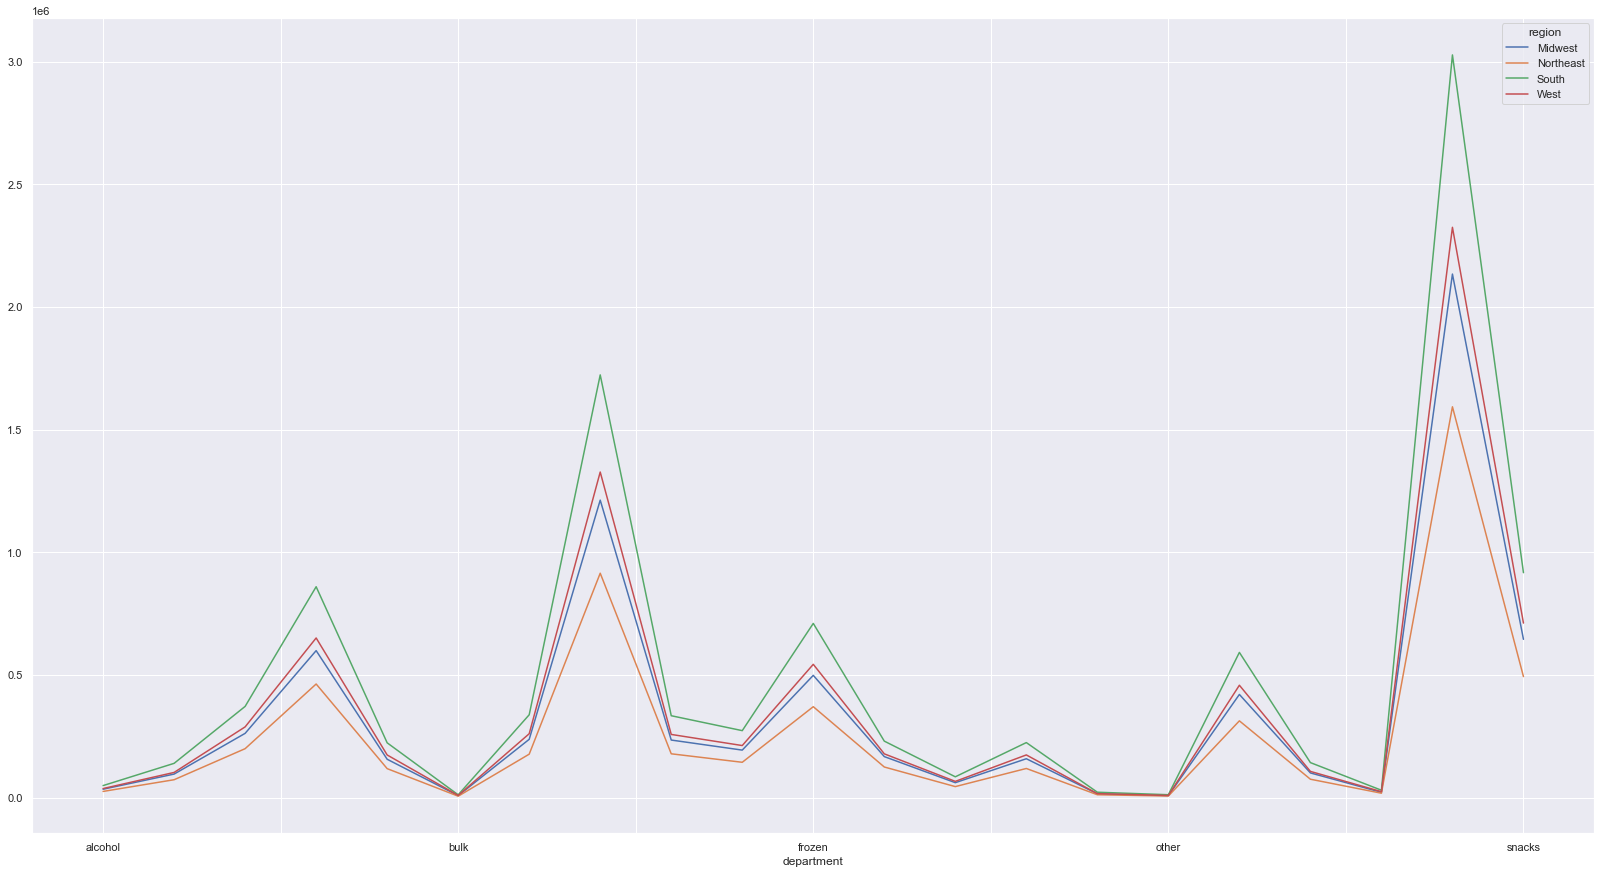

In [73]:
#creating line chart for products purchased in each department for region
line_department_region = department_region.plot.line()

# d.1 Pet Profile

In [74]:
# creating cross tabs to display relation between regions and ordering pet products
pet_region = pd.crosstab(df_merged['region'], df_merged['pet_flag'], dropna = False)


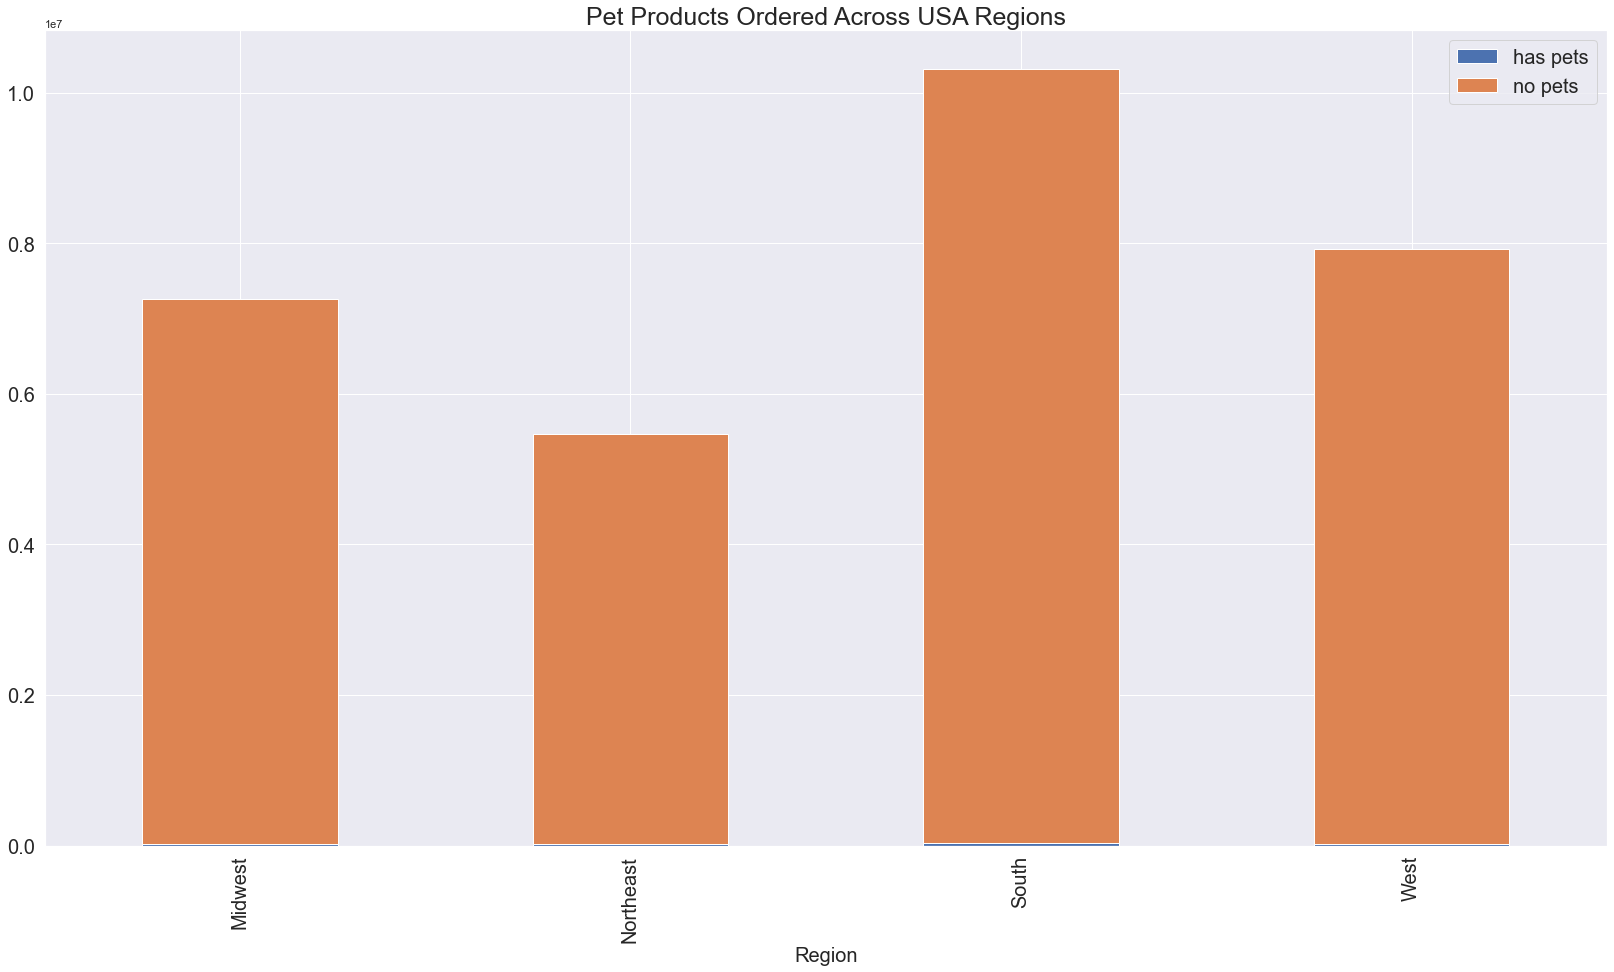

In [75]:
# creating bar chart to show the relation between region and pet products
pet_region_bar=pet_region.plot.bar(stacked=True, fontsize=20)
plt.title('Pet Products Ordered Across USA Regions', fontsize=25)
plt.xlabel('Region', fontsize=20)
plt.legend(fontsize=20, loc='upper right')

# d.2 Baby Products Profile

In [76]:
# creating crosstab to see the relation between family status and babies products
family_babies = pd.crosstab(df_merged['marital_status'], df_merged['babies_flag'], dropna = False)
family_babies

babies_flag,has babies,no babies
marital_status,,
divorced/widowed,34351,2610920
living with parents and siblings,19381,1461791
married,287683,21456028
single,68977,5025433


Text(0.5, 0, 'Family Status')

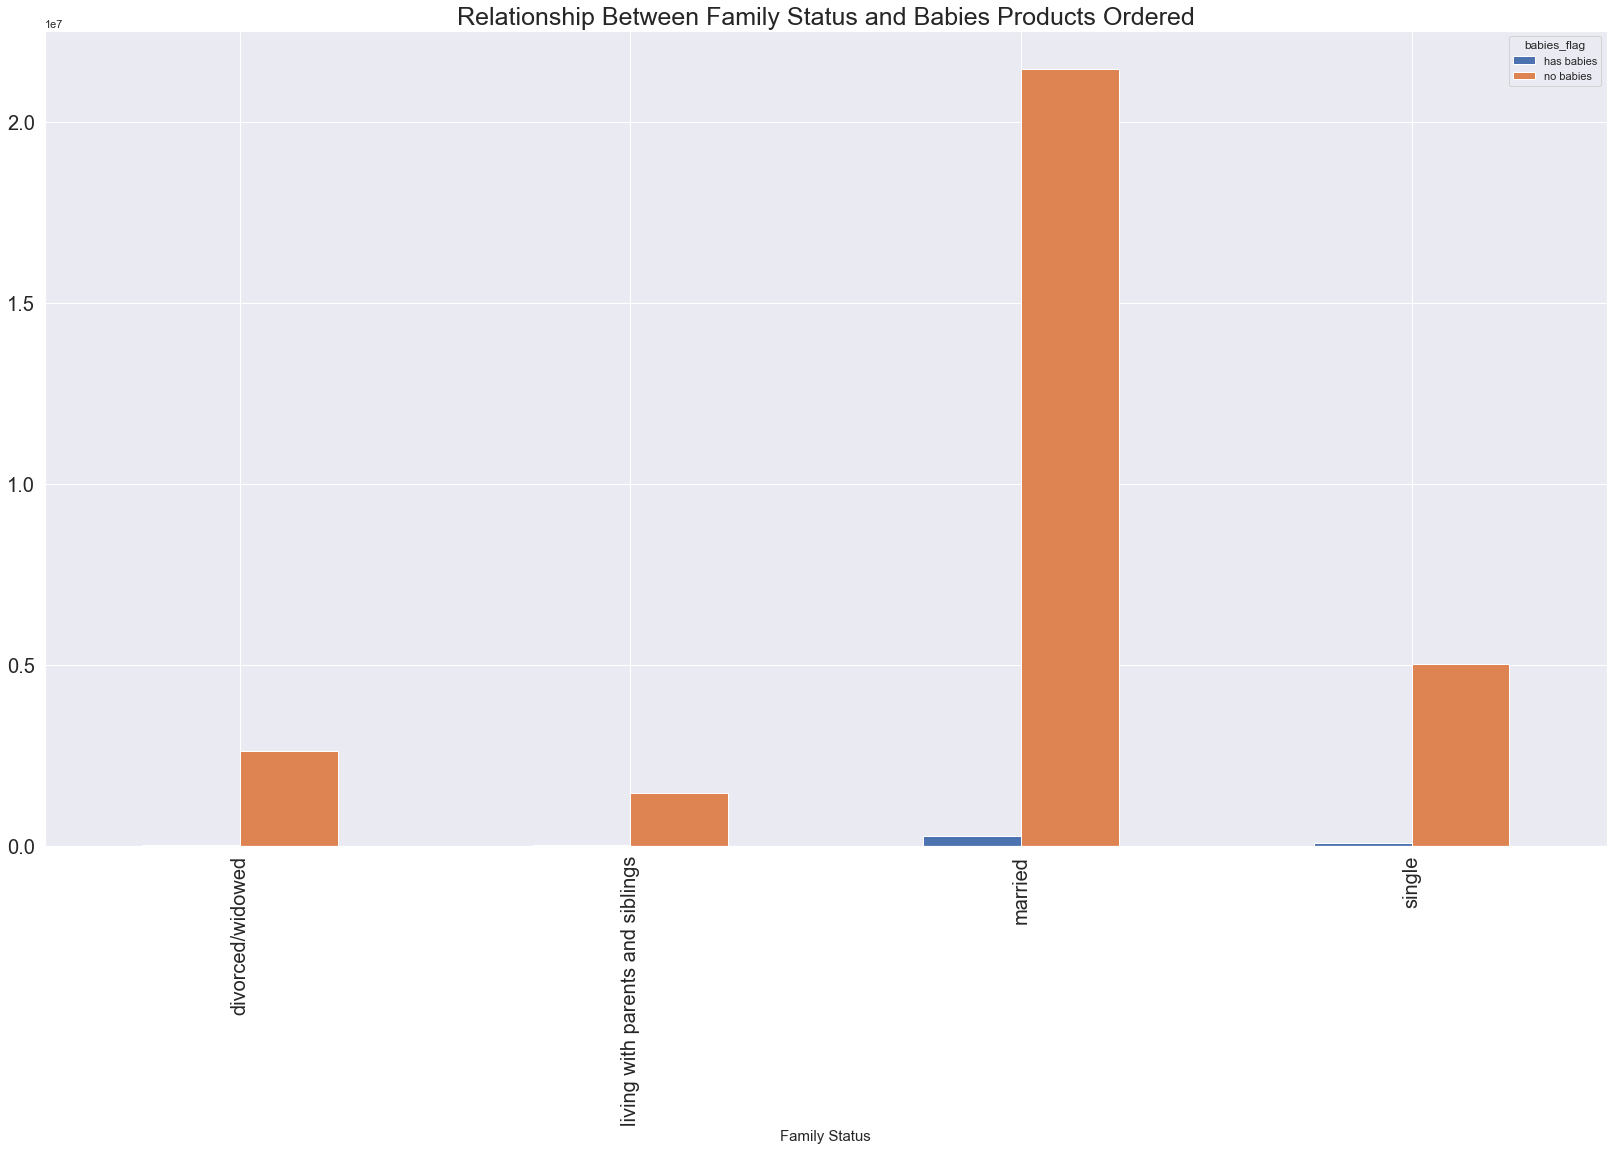

In [77]:
# creating stacked bar chart to see the relation between family status and babies products
bar_family_babies=family_babies.plot.bar(fontsize=20)
plt.title('Relationship Between Family Status and Babies Products Ordered', fontsize=25)
plt.xlabel('Family Status', fontsize=15)

# 8. Additional visualizations and analysis

In [78]:
# finding the total orders made in each hour of the day 
hour_day = df_merged['order_hour_of_day'].value_counts(dropna = False).rename_axis('hour_of_day').reset_index(name='counts')
hour_day

,hour_of_day,counts
0,10,2649744
1,11,2614880
2,14,2567903
3,13,2539276
4,15,2535966
5,12,2495795
6,16,2413681
7,9,2363611
8,17,1982345
9,8,1659110


Text(0, 0.5, 'Number of Orders')

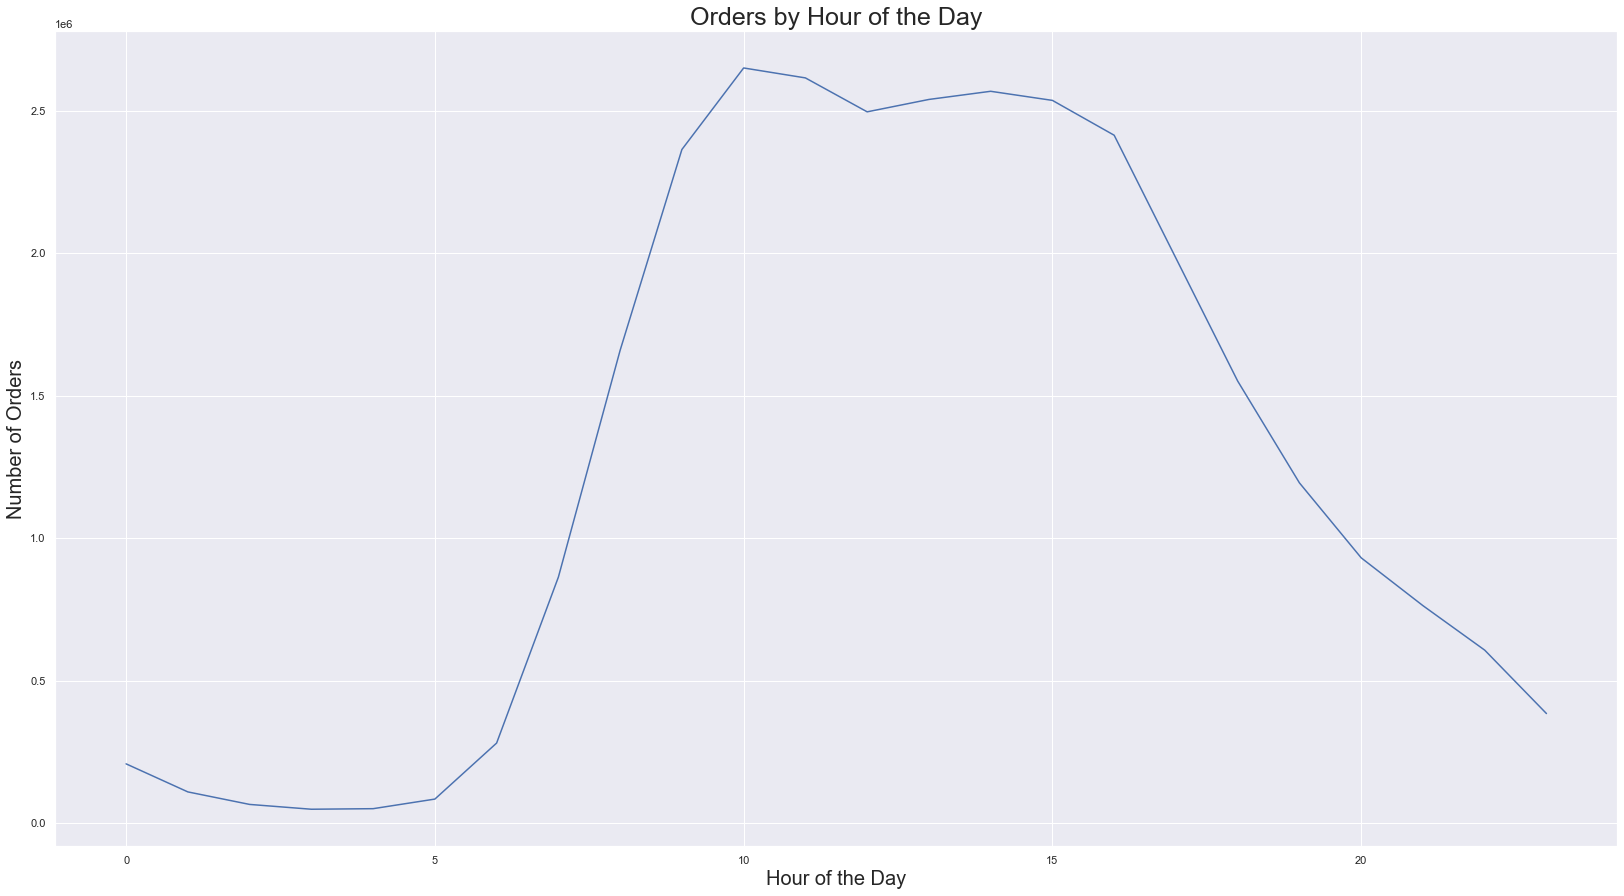

In [79]:
# creating line chart to see the orders per hour
line_hour_day = sns.lineplot(data = hour_day, x = 'hour_of_day', y = 'counts')
line_hour_day.axes.set_title("Orders by Hour of the Day",fontsize=25)
line_hour_day.set_xlabel("Hour of the Day",fontsize=20)
line_hour_day.set_ylabel("Number of Orders",fontsize=20)

Text(0, 0.5, 'Number of Orders')

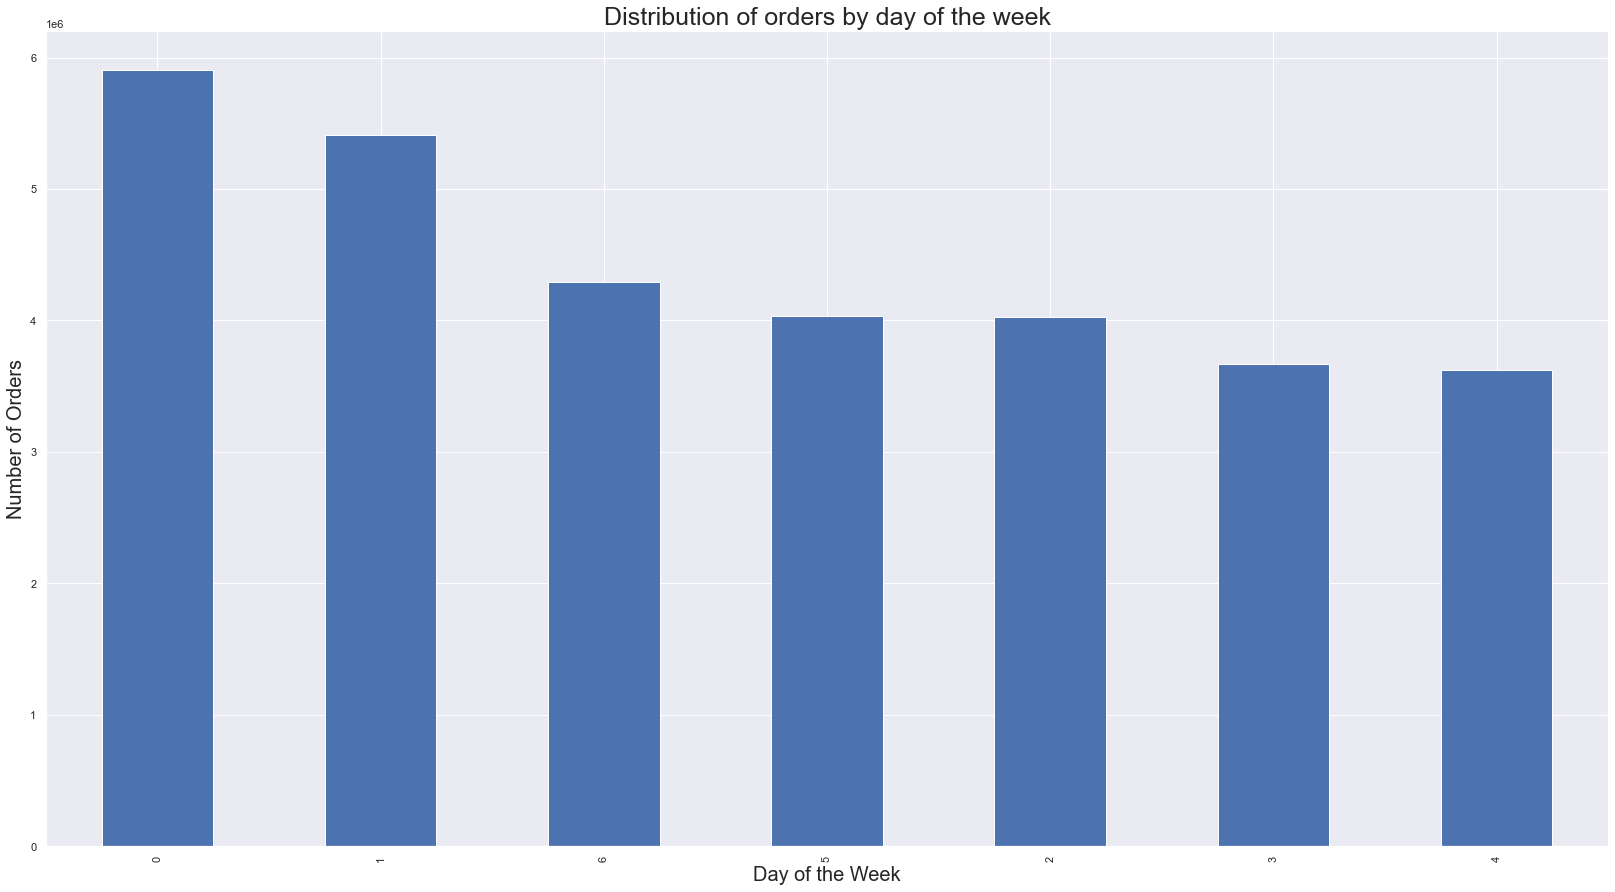

In [80]:
# creating bar chart for orders in day of the week
bar_hour_day = df_merged['orders_day_of_the_week'].value_counts().plot.bar()
plt.title('Distribution of orders by day of the week', fontsize=25)
plt.xlabel('Day of the Week', fontsize=20)
plt.ylabel('Number of Orders', fontsize=20)

<AxesSubplot:title={'center':'Composition of Orders by Loyalty Flag'}>

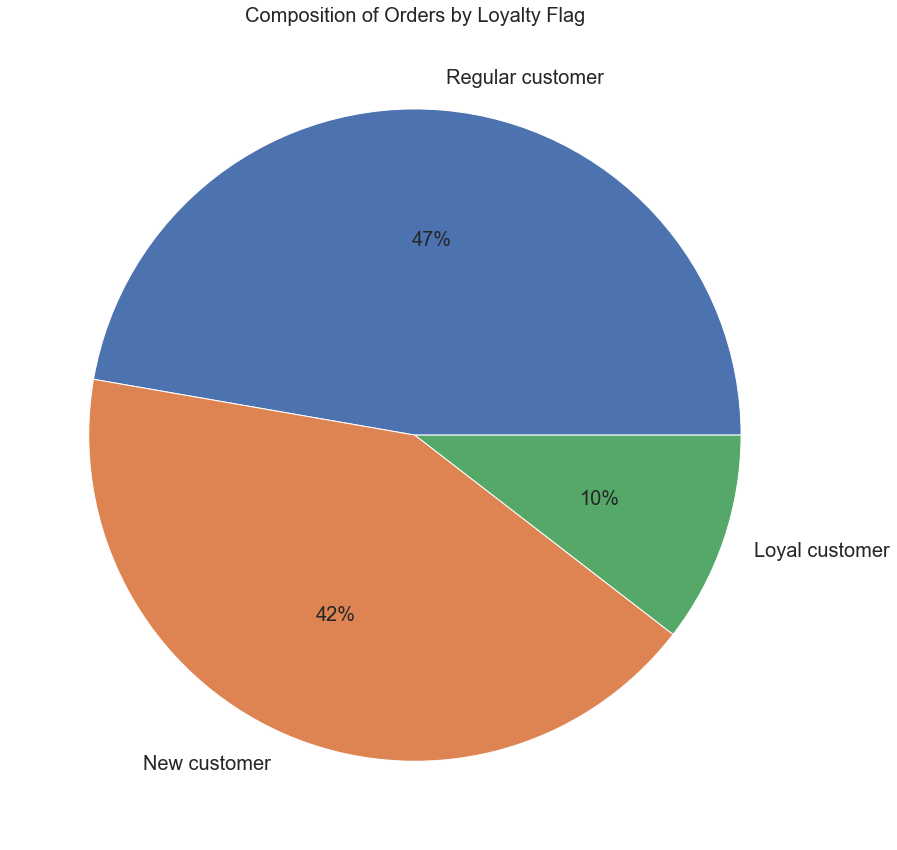

In [81]:
#Distribution of customers based on loyalty
customers_loyalty=df_unique['loyalty_flag'].value_counts(dropna=False)
pie_loyalty=customers_loyalty.plot.pie(label='',autopct=('%1.f%%'), textprops={'fontsize': 20})
plt.title('Composition of Orders by Loyalty Flag', fontsize = 20)
pie_loyalty

<AxesSubplot:title={'center':'Composition of Products by Price Range'}>

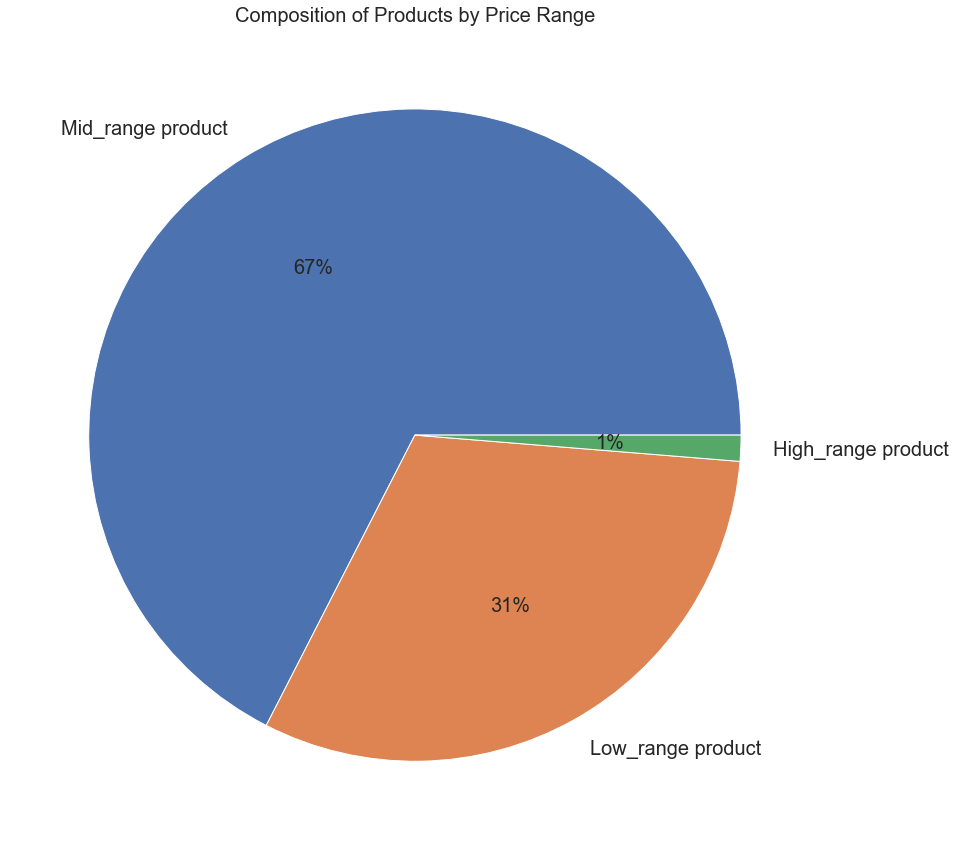

In [82]:
# Price range Distribution of Instacart
price_range_dis = df_merged['price_range_loc'].value_counts(dropna = False)
pie_price_range_dis =price_range_dis.plot.pie(label='',autopct=('%1.f%%'), textprops={'fontsize': 20})
plt.title('Composition of Products by Price Range', fontsize = 20)
pie_price_range_dis

# 9. Exporting Visualizations

In [83]:
region_spending_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_spending_bar.png'))

In [84]:
# Age Profile distribution - Visualizations
bar_age_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_region.png'))
loyalty_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_age.png'))
line_age_ordertime.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_ordertime.png'))
line_age_orderday.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_orderday.png'))

In [85]:
# Income Profile distribution - Visualizations
Hist_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Hist_income.png'))
bar_income_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_region.png'))
bar_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_income.png'))
bar_income_price.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_price.png'))

In [86]:
# No of Dependents- Visualizations
bar_dependents.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dependents.png'))
bar_dependant_frequency.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dependant_frequency.png'))

In [87]:
# Department - Visualizations
department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_bar.png'))
line_department_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_department_region.png'))

In [88]:
# Pet Profile - Visualizations
pet_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_region_bar.png'))
# babies Profile - Visualizations
bar_family_babies.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_family_babies.png'))

In [89]:
# Additional Visualizations
line_hour_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hour_day.png'))
bar_hour_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_hour_day.png'))
pie_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_loyalty.png')) 
pie_price_range_dis.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_price_range_dis.png')) 